In [4]:
import numpy as np
from pyPolCal.csv_tools import read_csv,match_fits_tags
from pyPolCal.on_sky import write_fits_info_to_csv_psf,fit_CHARIS_Mueller_matrix_by_bin_m3
import matplotlib.pyplot as plt
plt.rcParams.update({
    #"text.usetex": True,
    "font.family": "serif",
    "font.size": 16,
    "lines.linewidth": 3,
})
from matplotlib.ticker import MultipleLocator
from pyPolCal.utils import process_errors,generate_system_mueller_matrix,process_dataset,process_model
from pyPolCal.fitting import model
from pyPolCal.plotting import plot_data_and_model
from pyPolCal.constants import wavelength_bins
from pyMuellerMat.physical_models.charis_physical_models import HWP_retardance, IMR_retardance,M3_diattenuation,M3_retardance


In [4]:
# prep pol standards by reverting filenames back to original tags

path1 = '/home/thomasmc/charis_mm_testing/HD30675-pol/flat-cubes'
path2 = '/home/thomasmc/charis_mm_testing/HD43384-pol/flat-cubes'
# match_fits_tags(path1)
# match_fits_tags(path2)

Renamed n0054e_flat.fits to CRSA00155330_flat_cube.fits
Renamed n0008e_flat.fits to CRSA00155284_flat_cube.fits
Renamed n0015e_flat.fits to CRSA00155291_flat_cube.fits
Renamed n0085e_flat.fits to CRSA00155361_flat_cube.fits
Renamed n0006e_flat.fits to CRSA00155282_flat_cube.fits
Renamed n0099e_flat.fits to CRSA00155375_flat_cube.fits
Renamed n0035e_flat.fits to CRSA00155311_flat_cube.fits
Renamed n0093e_flat.fits to CRSA00155369_flat_cube.fits
Renamed n0060e_flat.fits to CRSA00155336_flat_cube.fits
Renamed n0063e_flat.fits to CRSA00155339_flat_cube.fits
Renamed n0092e_flat.fits to CRSA00155368_flat_cube.fits
Renamed n0051e_flat.fits to CRSA00155327_flat_cube.fits
Renamed n0070e_flat.fits to CRSA00155346_flat_cube.fits
Renamed n0078e_flat.fits to CRSA00155354_flat_cube.fits
Renamed n0100e_flat.fits to CRSA00155376_flat_cube.fits
Renamed n0027e_flat.fits to CRSA00155303_flat_cube.fits
Renamed n0003e_flat.fits to CRSA00155279_flat_cube.fits
Renamed n0075e_flat.fits to CRSA00155351_flat_cu

In [ ]:
# write csv for HD30675
cubedir = '/home/thomasmc/charis_mm_testing/HD30675-pol/flat-cubes'
rawdir = '/home/thomasmc/charis_mm_testing/HD30675-pol/raw'
centroid_guesses = [(70,80), (134,113)]
annuli_radii = ([15.6,25.6],[15.6,25.6]) 
aper_radii = (15.6,15.6) # 3X fwhm
boxssize = 45 # box to search for psf
for bin in range(22):
    csv_out = f'/home/thomasmc/charis_mm_testing/HD30675-pol/csvs/bin{bin}.csv'
    write_fits_info_to_csv_psf(cubedir,rawdir,csv_out,centroid_guesses,aper_radii,
                               boxssize,bin,bkgd_annuli_radii=annuli_radii,plot_every_x=25)

In [3]:
# the hwp angles don't start with 0 so I need to get rid of 1 for every csv
from glob import glob
import pandas as pd
csv_files = glob('/home/thomasmc/charis_mm_testing/HD30675-pol/csvs/bin*.csv')
# for file in csv_files:
#     df = pd.read_csv(file)
#     df = df[1:] # remove first row
#     df.to_csv(file,index=False)
#     print(f'Updated {file}')

Updated /home/thomasmc/charis_mm_testing/HD30675-pol/csvs/bin13.csv
Updated /home/thomasmc/charis_mm_testing/HD30675-pol/csvs/bin10.csv
Updated /home/thomasmc/charis_mm_testing/HD30675-pol/csvs/bin0.csv
Updated /home/thomasmc/charis_mm_testing/HD30675-pol/csvs/bin15.csv
Updated /home/thomasmc/charis_mm_testing/HD30675-pol/csvs/bin17.csv
Updated /home/thomasmc/charis_mm_testing/HD30675-pol/csvs/bin19.csv
Updated /home/thomasmc/charis_mm_testing/HD30675-pol/csvs/bin8.csv
Updated /home/thomasmc/charis_mm_testing/HD30675-pol/csvs/bin11.csv
Updated /home/thomasmc/charis_mm_testing/HD30675-pol/csvs/bin2.csv
Updated /home/thomasmc/charis_mm_testing/HD30675-pol/csvs/bin1.csv
Updated /home/thomasmc/charis_mm_testing/HD30675-pol/csvs/bin18.csv
Updated /home/thomasmc/charis_mm_testing/HD30675-pol/csvs/bin6.csv
Updated /home/thomasmc/charis_mm_testing/HD30675-pol/csvs/bin16.csv
Updated /home/thomasmc/charis_mm_testing/HD30675-pol/csvs/bin4.csv
Updated /home/thomasmc/charis_mm_testing/HD30675-pol/c

In [ ]:
# now process HD43384
cubedir = '/home/thomasmc/charis_mm_testing/HD43384-pol/flat-cubes'
rawdir = '/home/thomasmc/charis_mm_testing/HD43384-pol/raw'
centroid_guesses = [(76,83), (141,115)]
annuli_radii = ([15,20],[15,20]) # psf way too large for space 
aper_raddii = (15,15) # psf way too large for fitted fwhm
boxssize = 41 # box to search for psf
for bin in range(22):
    csv_out = f'/home/thomasmc/charis_mm_testing/HD43384-pol/csvs/bin{bin}.csv'
    write_fits_info_to_csv_psf(cubedir,rawdir,csv_out,centroid_guesses,aper_radii,
                               boxssize,bin,bkgd_annuli_radii=annuli_radii,plot_every_x=25)


In [7]:
# remove the first 3 from these csvs for even hwp cycle
csv_files = glob('/home/thomasmc/charis_mm_testing/HD43384-pol/csvs/bin*.csv')
for file in csv_files:
    #  df = pd.read_csv(file)
    #  df = df[3:] # remove first 3 rows
    #  df.to_csv(file,index=False)
    #  print(f'Updated {file}')

Updated /home/thomasmc/charis_mm_testing/HD43384-pol/csvs/bin13.csv
Updated /home/thomasmc/charis_mm_testing/HD43384-pol/csvs/bin10.csv
Updated /home/thomasmc/charis_mm_testing/HD43384-pol/csvs/bin0.csv
Updated /home/thomasmc/charis_mm_testing/HD43384-pol/csvs/bin15.csv
Updated /home/thomasmc/charis_mm_testing/HD43384-pol/csvs/bin17.csv
Updated /home/thomasmc/charis_mm_testing/HD43384-pol/csvs/bin19.csv
Updated /home/thomasmc/charis_mm_testing/HD43384-pol/csvs/bin8.csv
Updated /home/thomasmc/charis_mm_testing/HD43384-pol/csvs/bin11.csv
Updated /home/thomasmc/charis_mm_testing/HD43384-pol/csvs/bin2.csv
Updated /home/thomasmc/charis_mm_testing/HD43384-pol/csvs/bin1.csv
Updated /home/thomasmc/charis_mm_testing/HD43384-pol/csvs/bin18.csv
Updated /home/thomasmc/charis_mm_testing/HD43384-pol/csvs/bin6.csv
Updated /home/thomasmc/charis_mm_testing/HD43384-pol/csvs/bin16.csv
Updated /home/thomasmc/charis_mm_testing/HD43384-pol/csvs/bin4.csv
Updated /home/thomasmc/charis_mm_testing/HD43384-pol/c

In [8]:
wavelength_bins

array([1159.5614, 1199.6971, 1241.2219, 1284.184 , 1328.6331, 1374.6208,
       1422.2002, 1471.4264, 1522.3565, 1575.0495, 1629.5663, 1685.9701,
       1744.3261, 1804.7021, 1867.1678, 1931.7956, 1998.6603, 2067.8395,
       2139.4131, 2213.4641, 2290.0781, 2369.3441])

In [8]:
# use serkowski law and known aolp to define s_in for j band
def serkowski(lam, p_max, lam_max, k):
    return p_max * np.exp(-k * np.log(lam_max / lam) ** 2)

# get parameters set
lam_j =wavelength_bins[:6] # j band
p_max = 3.9
lam_max = 0.52*1000 # converting to nm
k = 0.99
aolp_j = np.deg2rad(58)

def input_stokes(lam,p_max,lam_max,k,aolp):
    """
    Returns an input Stokes vector for given wavelength based on 
    Serkowski law and angle of linear polarization.
    
    Parameters
    ----------
    lam : float
        Wavelength in nm.

    p_max : float
        Maximum polarization percentage.

    lam_max : float
        Wavelength at which maximum polarization occurs in nm.

    k : float
        k parameter of the Serkowski law.

    aolp : float
        Angle of linear polarization in radians.

    Returns
    -------
    s_in : ndarray
        Linearly polarized Stokes vector [I, Q, U, 0].

    """
    lam = np.array(lam)
    p = serkowski(lam,p_max,lam_max,k)/100 # convert to fraction
    q = p * np.cos(2*aolp)
    u = p * np.sin(2*aolp)
    s_in = np.array([1,q,u,0])
    return s_in

In [9]:
# modify model function to work with a list of input stokes vectors
from pyPolCal.utils import update_system_mm,parse_configuration,generate_measurement
def model_s_in_array(p, system_parameters, system_mm, configuration_list, p_max,
        lam_max, k, aolp, process_model = None):
    """Returns simulated L/R wollaston beam intensities for a given set of parameters based on
    parameter values, a dictionary detailing those values based on pyMuellerMat, 
    a pyMuellerMat system Mueller matrix, and a list of configurations for the 
    system Mueller matrix.

    Parameters
    ----------
    p : list of float
        List of parameter values. One list of values per parameter.
    
    system_parameters : list of [str, str]
        List of ['component_name', 'parameter_name'] pairs corresponding to `p`.
        For example, [['Polarizer', 'Theta'], ['Polarizer', 'Phi']] if your p
        is two lists of parameters Theta and Phi for a Polarizer component.

    system_mm : pyMuellerMat system Mueller matrix object
        Mueller matrix model of the optical system. Any parameters
        that are specified in p and system_parameters will be replaced.

    configuration_list : list of dict
        Each dict will update parameters of your current system_mm 
        to generate measurements. For example, if you want 9 HWP angles
        and one derotator angle, each config dict will have this form:
        {"hwp": {"theta": hwp_angle},
        "image_rotator": {"theta": 45.0}
        Append each unique configuration to your configuration_list.

    p_max : float
        Maximum polarization percentage.
    
    lam_max : float
        Wavelength at which maximum polarization occurs in nm.

    k : float
        k parameter of the Serkowski law.

    aolp : float
        Angle of linear polarization in radians.


    process_model : callable, optional
        Converts output intensities to double differences. 

    Returns
    --------
    np.ndarray
        Simulated intensities [L,R,L,R..]

    """
    
    # Default s_in if not provided

    # Update the system Mueller matrix with parameters that we're fitting
    system_mm = update_system_mm(p, system_parameters, system_mm)

    # Generate a model dataset
    output_intensities = []

    # Save the parameters necessary to switch between o and e beam
    o_beam_values, wollaston_beam_keyword = parse_configuration({'wollaston': {'beam': 'o'}})
    e_beam_values, wollaston_beam_keyword = parse_configuration({'wollaston': {'beam': 'e'}})

    for i in range(len(configuration_list)):
        values, keywords = parse_configuration(configuration_list[i])
        system_mm = update_system_mm(values, keywords, system_mm)

        # Compute the intensity for the ordinary beam
        system_mm = update_system_mm(o_beam_values, wollaston_beam_keyword, system_mm)

        # get wavelength from configuration
        lam = configuration_list[i]['M3']['wavelength']
        s_in = input_stokes(lam,p_max,lam_max,k,aolp)
        s_out_o = generate_measurement(system_mm, s_in)
        o_intensity = s_out_o[0]

        # Compute the intensity for the extraordinary beam
        system_mm = update_system_mm(e_beam_values, wollaston_beam_keyword, system_mm)
        s_out_e = generate_measurement(system_mm, s_in)
        e_intensity = s_out_e[0]

        output_intensities.append(o_intensity)
        output_intensities.append(e_intensity)

    # Optionally parse the intensities into another variable (e.g., normalized difference)
    if process_model is not None:
        output_intensities = process_model(output_intensities)

    # Convert intensities list to numpy arrays
    output_intensities = np.array(output_intensities)

    return output_intensities


In [60]:
# get values for j band
from pyPolCal.csv_tools import read_csv_physical_model_all_bins
csvs_j = '../datacsvs/onsky_csvs/pol_standards/HD30675-J'
interleaved_values_j, interleaved_stds_j, interleaved_configs_j = read_csv_physical_model_all_bins(csvs_j,m3=True)
stds_j = process_errors(interleaved_stds_j,interleaved_values_j)[::2]
diffs_j = process_dataset(interleaved_values_j)[::2]
configs_j = interleaved_configs_j
print(configs_j[0])


Expected 22 CSV files for all wavelength bins, but found 6
{'hwp': {'theta': 0.0, 'wavelength': 1159.5614}, 'image_rotator': {'theta': 88.90286, 'wavelength': 1159.5614}, 'altitude_rot': {'pa': 48.79694762}, 'M3': {'wavelength': 1159.5614}, 'parang_rot': {'pa': 91.79203064543496}, 'wollaston': {'wavelength': 1159.5614}}


In [62]:
# generate model 
from pyPolCal.csv_tools import model_data
from pyPolCal.utils import parse_configuration
wavelength_bins = np.array([1159.5614, 1199.6971, 1241.2219, 1284.184 , 1328.6331, 1374.6208,
1422.2002, 1471.4264, 1522.3565, 1575.0495, 1629.5663, 1685.9701,
1744.3261, 1804.7021, 1867.1678, 1931.7956, 1998.6603, 2067.8395,
2139.4131, 2213.4641, 2290.0781, 2369.3441])
wavelength_bin = 15 # placeholder
epsilon_cal = 1 # defining as perfect, reasoning in Joost t Hart 2021
offset_imr = 0.13214
offset_hwp = -0.99287
offset_cal = 0.49797
imr_theta = 0 # placeholder 
hwp_theta = 0 # placeholder
# Past fits from scipy minimize on the naive fits
d = 259.12694
wsio2 = 1.64601
wmgf2 = 1.28540
imr_phi = IMR_retardance(wavelength_bins,259.12694)[wavelength_bin]
hwp_phi = HWP_retardance(wavelength_bins,1.64601,1.28540)[wavelength_bin]
df_elip = model_data('/Users/thomasmcintosh/Desktop/CHARIS-REU/Fitting/naive_fitting/elliptical_imr')

#imr_phi_wol = df_elip['image_rotator_phi'].values[bin]
wol_eta = df_elip['wollaston_eta'].values[bin]
m3_diat = M3_diattenuation(wavelength_bins[4])
m3_ret = M3_retardance(wavelength_bins[4])
m1, b1, m2, b2 = (1.94073,13.69728,2.07958,13.88817)

# Define instrument configuration as system dictionary

system_dict = {
        "components" : {
            "wollaston" : {
            "type" : "wollaston_prism_function",
            "properties" : {"beam": 'o'}, 
            "tag": "internal",
            },
            "image_rotator" : {
                "type" : "SCExAO_IMR_function",
                "properties" : {"wavelength":wavelength_bins[wavelength_bin], "d": d, "theta": imr_theta, "delta_theta": offset_imr},
                "tag": "internal",
            },
            "hwp" : {
                "type" : "two_layer_HWP_function",
                "properties" : {"wavelength": wavelength_bins[wavelength_bin], "w_SiO2": wsio2, "w_MgF2": wmgf2, "theta":hwp_theta, "delta_theta": offset_hwp},
                "tag": "internal",
            },
            "altitude_rot" : {
                "type" : "rotator_function",
                "properties" : {"pa":77},
                "tag":"internal",
            },
            "M3" : {
                "type" : "SUBARU_M3_function",
                "properties" : {"wavelength": wavelength_bins[wavelength_bin], "m1":m1, "b1":b1, "m2":m2, "b2":b2},
                "tag": "internal",
            },
            "parang_rot" : {
                "type" : "rotator_function",
                "properties" : {"pa":39},
                "tag":"internal",
            },
            }
    }

# define initial guess and bounds
p0_dict = {
    "M3_diat" : 
        {"m1":m1,"b1":b1, "m2":m2,"b2":b2}
}
m1_bounds = (0.8*m1, 1.2*m1)
b1_bounds = (0.8*b1, 1.2*b1)
m2_bounds = (0.8*m2, 1.2*m2)
b2_bounds = (0.8*b2, 1.2*b2)

bounds = [m1_bounds, b1_bounds, m2_bounds, b2_bounds]

# generate modeled left and right wollaston intensities
system_mm = generate_system_mueller_matrix(system_dict)
p, pkeys = parse_configuration(p0_dict) # put into correct form for model function
dds = model_s_in_array(p,pkeys,system_mm,configs_j,p_max,lam_max,k,aolp_j,process_model=process_model)[::2]


Component 'M3_diat' not found in System Mueller Matrix. Skipping...
Component 'M3_diat' not found in System Mueller Matrix. Skipping...
Component 'M3_diat' not found in System Mueller Matrix. Skipping...
Component 'M3_diat' not found in System Mueller Matrix. Skipping...
Parameter 'wavelength' not found in component 'wollaston'. Skipping...
Parameter 'wavelength' not found in component 'wollaston'. Skipping...
Parameter 'wavelength' not found in component 'wollaston'. Skipping...
Parameter 'wavelength' not found in component 'wollaston'. Skipping...
Parameter 'wavelength' not found in component 'wollaston'. Skipping...
Parameter 'wavelength' not found in component 'wollaston'. Skipping...
Parameter 'wavelength' not found in component 'wollaston'. Skipping...
Parameter 'wavelength' not found in component 'wollaston'. Skipping...
Parameter 'wavelength' not found in component 'wollaston'. Skipping...
Parameter 'wavelength' not found in component 'wollaston'. Skipping...
Parameter 'wavelen

In [63]:
# generate s
s_res_by_wavelength = []
for bin in range(6):
    # mask per bin
    bin_mask = []
    for dict in configs_j[::2]:
        if dict['hwp']['wavelength'] == wavelength_bins[bin]:
            bin_mask.append(True)
        else:
            bin_mask.append(False)

    # apply mask
    double_diffs_bin = diffs_j[bin_mask]
    double_diffs_stds_bin = stds_j[bin_mask]
    config_lists_bin = np.array(configs_j[::2])[bin_mask]
    modeled_double_differences_bin = dds[bin_mask]
    # calculate s_res as in appendix E of SPHERE cal paper
    residuals = (double_diffs_bin*100-modeled_double_differences_bin*100)
    s_res = np.sqrt(np.sum(residuals**2)/(len(diffs_j[bin_mask])))
    s_res_by_wavelength.append(s_res)

Text(0.5, 1.0, 's_res by wavelength bin for HD30675 J band')

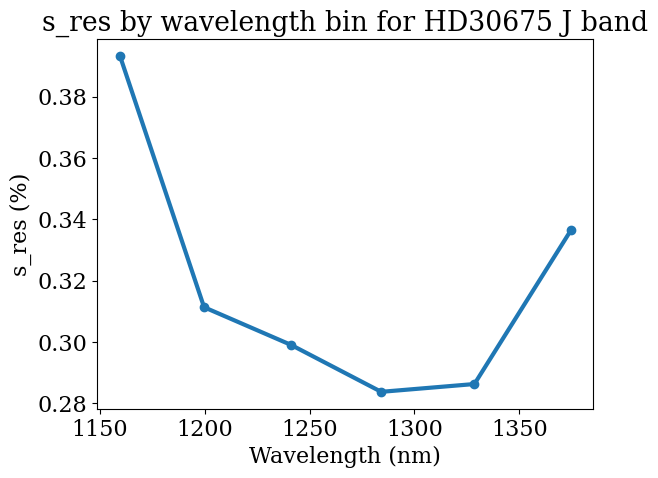

In [64]:
plt.plot(lam_j,s_res_by_wavelength,'o-')
plt.xlabel('Wavelength (nm)')
plt.ylabel('s_res (%)')
plt.title('s_res by wavelength bin for HD30675 J band')

In [34]:
# now use H band
aolp_h = 61
lam_h = wavelength_bins[8:14]
csvs_h = '/home/thomasmc/charis_mm_testing/HD30675-pol/csvs_band/h'
interleaved_values_h, interleaved_stds_h, interleaved_configs_h = read_csv_physical_model_all_bins(csvs_h,m3=True)
stds_h = process_errors(interleaved_stds_h,interleaved_values_h)[::2]
diffs_h = process_dataset(interleaved_values_h)[::2]
configs_h = interleaved_configs_h

# generate model
dds_h = model_s_in_array(p,pkeys,system_mm,configs_h,p_max,lam_max,k,aolp_h,process_model=process_model)[::2]
print(configs_h)

FileNotFoundError: The directory /home/thomasmc/charis_mm_testing/HD30675-pol/csvs_band/h does not exist.

In [138]:
# generate s
s_res_by_wavelength_h = []
for bin in range(8,14):
    # mask per bin
    bin_mask = []
    for dict in configs_h[::2]:
        if dict['hwp']['wavelength'] == wavelength_bins[bin]:
            bin_mask.append(True)
        else:
            bin_mask.append(False)

    # apply mask
    double_diffs_bin = diffs_h[bin_mask]
    double_diffs_stds_bin = stds_h[bin_mask]
    config_lists_bin = np.array(configs_h[::2])[bin_mask]
    modeled_double_differences_bin = dds_h[bin_mask]
    # calculate s_res as in appendix E of SPHERE cal paper
    residuals = (double_diffs_bin*100-modeled_double_differences_bin*100)
    s_res = np.sqrt(np.sum(residuals**2)/(len(diffs_h[bin_mask])))
    s_res_by_wavelength_h.append(s_res)

In [130]:
print(wavelength_bins)

[1159.5614 1199.6971 1241.2219 1284.184  1328.6331 1374.6208 1422.2002
 1471.4264 1522.3565 1575.0495 1629.5663 1685.9701 1744.3261 1804.7021
 1867.1678 1931.7956 1998.6603 2067.8395 2139.4131 2213.4641 2290.0781
 2369.3441]


In [139]:
# now for k band

aolp_k = 62
lam_k = wavelength_bins[15:18] # first one is slightly out of range
csvs_k = '/home/thomasmc/charis_mm_testing/HD30675-pol/csvs_band/k'
interleaved_values_k, interleaved_stds_k, interleaved_configs_k = read_csv_physical_model_all_bins(csvs_k,m3=True)
stds_k = process_errors(interleaved_stds_k,interleaved_values_k)[::2]
diffs_k = process_dataset(interleaved_values_k)[::2]
configs_k = interleaved_configs_k

# generate model
dds_k = model_s_in_array(p,pkeys,system_mm,configs_k,p_max,lam_max,k,aolp_k,process_model=process_model)[::2]

Expected 22 CSV files for all wavelength bins, but found 3


In [1]:
# generate s
s_res_by_wavelength_k = []
for bin in range(15,18):
    # mask per bin
    bin_mask = []
    for dict in configs_k[::2]:
        if dict['hwp']['wavelength'] == wavelength_bins[bin]:
            bin_mask.append(True)
        else:
            bin_mask.append(False)

    # apply mask
    double_diffs_bin = diffs_k[bin_mask]
    double_diffs_stds_bin = stds_k[bin_mask]
    config_lists_bin = np.array(configs_k[::2])[bin_mask]
    modeled_double_differences_bin = dds_k[bin_mask]
    # calculate s_res as in appendix E of SPHERE cal paper
    residuals = (double_diffs_bin*100-modeled_double_differences_bin*100)
    s_res = np.sqrt(np.sum(residuals**2)/(len(diffs_k[bin_mask])))
    s_res_by_wavelength_k.append(s_res)

NameError: name 'configs_k' is not defined

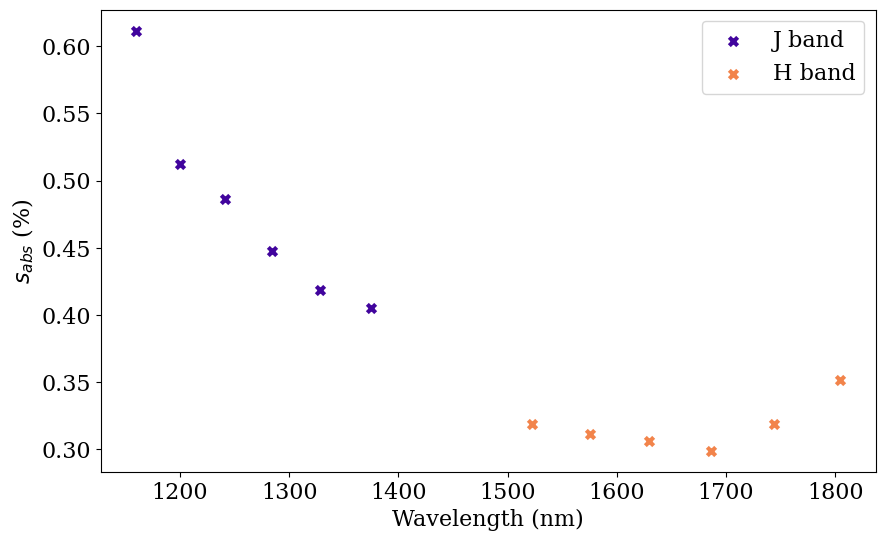

In [141]:
# due to high errors on k AoLP, let's just use j and h

s_j_h = np.concatenate((s_res_by_wavelength,s_res_by_wavelength_h))
lam_j_h = np.concatenate((lam_j,lam_h))

fig, ax = plt.subplots(figsize=(10,6))
cmap = plt.get_cmap('plasma')
c1 = cmap(0.1)
c2 = cmap(0.7)
ax.scatter(lam_j,s_res_by_wavelength,marker='x',color=c1,label='J band')
ax.scatter(lam_h,s_res_by_wavelength_h,marker='x',color=c2,label='H band')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel(r'$s_{abs}$ (%)')
ax.legend()
#plt.title('Polarimetric Accuracy for HD30675 Polarized Standard Star')
#plt.savefig('/home/thomasmc/charis_mm_testing/HD30675-pol/plots/s_res_j_h.png',dpi=600, bbox_inches='tight')

In [6]:
print(lam_j)

[1159.5614 1199.6971 1241.2219 1284.184  1328.6331 1374.6208]


In [115]:
num_binzero = np.tile(1159.5614,100)
num_bin1 = np.tile(1199.6971, 100)
num_bin2 = np.tile(1241.2219, 100)
num_bin3 = np.tile(1284.184, 100)
num_bin4 = np.tile(1328.6331, 100)
num_bin5 = np.tile(1374.6208, 100)
binlist = np.concatenate((num_binzero,num_bin1,num_bin2,num_bin3,num_bin4,num_bin5))
retbin0 = np.tile(4.312066, 100)
retbin1 = np.tile(4.032615, 100)
retbin2 = np.tile(3.808162, 100)
retbin3 = np.tile(3.530920,100)
retbin4 = np.tile(3.300222, 100)
retbin5 = np.tile(2.752394, 100)
retlist = np.concatenate((retbin0, retbin1, retbin2, retbin3, retbin4, retbin5))
imrretlist = np.concatenate((np.tile(4.312066,100),np.tile(4.036215,100),
                             np.tile(3.808162,100),np.tile(3.530920,100),
                             np.tile(3.300222,100),np.tile(2.752394,100)))

In [113]:
range(len(binlist))

range(0, 600)

In [119]:
import copy
# remove wavelength from config list

config_list_naive_hwp = copy.deepcopy(configs_j)
for config in config_list_naive_hwp:
    if "hwp" in config:
        del config['hwp']['wavelength']
        del config['image_rotator']['wavelength']


In [120]:
# try j band again but with naive model
# generate model 
from pyPolCal.utils import parse_configuration, process_model, generate_system_mueller_matrix

generated_dds = np.array([])
for idx,bin in enumerate(range(len(binlist))):
    epsilon_cal = 1 # defining as perfect, reasoning in Joost t Hart 2021
    offset_imr = 0.13214
    offset_hwp = -0.99287
    offset_cal = 0.49797
    imr_theta = 0 # placeholder 
    hwp_theta = 0 # placeholder
    # Past fits from scipy minimize on the naive fits
    d = 259.12694
    imr_phi = imrretlist[bin]
    m3_diat = M3_diattenuation(wavelength_bin)
    m3_ret = M3_retardance(wavelength_bin)
    m1=2.19663
    b1=13.12958
    m2=1.74416
    b2=14.05076
    hwp_phi = retlist[bin]
    wavelength_bin = binlist[bin]
 

    # Define instrument configuration as system dictionary

    system_dict = {
            "components" : {
                "wollaston" : {
                "type" : "wollaston_prism_function",
                "properties" : {"beam": 'o'}, 
                "tag": "internal",
                },
                "image_rotator" : {
                    "type" : "general_retarder_function",
                    "properties" : {"phi":imr_phi, "theta": imr_theta, "delta_theta": offset_imr},
                    "tag": "internal",
                },
                "hwp" : {
                    "type" : "general_retarder_function",
                    "properties" : {"phi":hwp_phi, "theta":hwp_theta, "delta_theta": offset_hwp},
                    "tag": "internal",
                },
                "altitude_rot" : {
                    "type" : "rotator_function",
                    "properties" : {"pa":77},
                    "tag":"internal",
                },
                "M3" : {
                    "type" : "SUBARU_M3_retardance_only_function",
                    "properties" : {"wavelength": wavelength_bin, "m1":m1, "b1":b1, "m2":m2, "b2":b2},
                    "tag": "internal",
                },
                "M3_diat" : {
                    "type" : "SUBARU_M3_diattenuation_only_function",
                    "properties" : {'wavelength': wavelength_bin, "m1" : 0,"b1":0,"m2":0,"b2":0},
                    "tag": "internal"
                },
                "parang_rot" : {
                    "type" : "rotator_function",
                    "properties" : {"pa":39},
                    "tag":"internal",
                },
                }
        }

    # define initial guess and bounds
    p0_dict = {
        "M3_diat" : 
            {"m1":m1,"b1":b1, "m2":m2,"b2":b2}
    }
    m1_bounds = (0.8*m1, 1.2*m1)
    b1_bounds = (0.8*b1, 1.2*b1)
    m2_bounds = (0.8*m2, 1.2*m2)
    b2_bounds = (0.8*b2, 1.2*b2)

    bounds = [m1_bounds, b1_bounds, m2_bounds, b2_bounds]

    # generate modeled left and right wollaston intensities
    system_mm = generate_system_mueller_matrix(system_dict)
    p, pkeys = parse_configuration(p0_dict) # put into correct form for model function
    configlist = config_list_naive_hwp[idx]
    dds = model_s_in_array(p,pkeys,system_mm,[configlist],p_max,lam_max,k,aolp_j)
    generated_dds = np.concatenate((generated_dds,dds))
    print(f'generated bin {idx}')


generated bin 0
generated bin 1
generated bin 2
generated bin 3
generated bin 4
generated bin 5
generated bin 6
generated bin 7
generated bin 8
generated bin 9
generated bin 10
generated bin 11
generated bin 12
generated bin 13
generated bin 14
generated bin 15
generated bin 16
generated bin 17
generated bin 18
generated bin 19
generated bin 20
generated bin 21
generated bin 22
generated bin 23
generated bin 24
generated bin 25
generated bin 26
generated bin 27
generated bin 28
generated bin 29
generated bin 30
generated bin 31
generated bin 32
generated bin 33
generated bin 34
generated bin 35
generated bin 36
generated bin 37
generated bin 38
generated bin 39
generated bin 40
generated bin 41
generated bin 42
generated bin 43
generated bin 44
generated bin 45
generated bin 46
generated bin 47
generated bin 48
generated bin 49
generated bin 50
generated bin 51
generated bin 52
generated bin 53
generated bin 54
generated bin 55
generated bin 56
generated bin 57
generated bin 58
generat

In [121]:
generated_dds = process_model(generated_dds)[::2]

In [122]:
# generate s
s_res_by_wavelength_naive = []
for bin in range(6):
    # mask per bin
    bin_mask = []
    for dict in configs_j[::2]:
        if dict['hwp']['wavelength'] == wavelength_bins[bin]:
            bin_mask.append(True)
        else:
            bin_mask.append(False)

    # apply mask
    double_diffs_bin = diffs_j[bin_mask]
    double_diffs_stds_bin = stds_j[bin_mask]
    config_lists_bin = np.array(configs_j[::2])[bin_mask]
    modeled_double_differences_bin = generated_dds[bin_mask]
    # calculate s_res as in appendix E of SPHERE cal paper
    residuals = (double_diffs_bin*100-modeled_double_differences_bin*100)
    print(np.mean(np.abs(residuals)))
    s_res = np.sqrt(np.sum(residuals**2)/(len(diffs_j[bin_mask])))
    s_res_by_wavelength_naive.append(s_res)

0.5181747159408288
0.302839403183156
0.2375922778727208
0.19462455730014416
0.20196637300893813
0.24640912486326141


Text(0.5, 1.0, 's_res by wavelength bin for HD30675 J band')

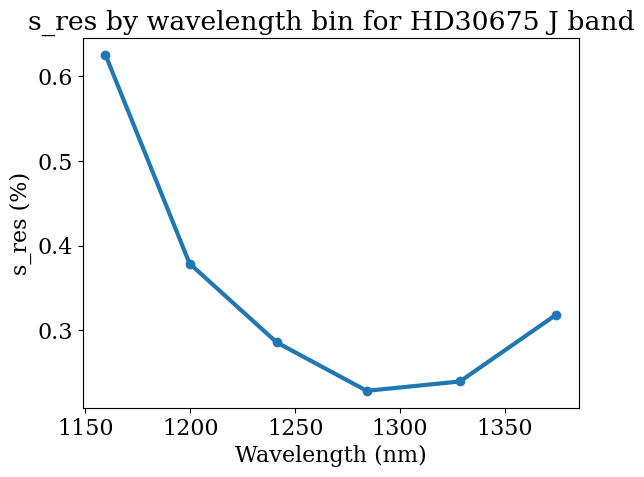

In [123]:
plt.plot(lam_j,s_res_by_wavelength_naive,'o-')
plt.xlabel('Wavelength (nm)')
plt.ylabel('s_res (%)')
plt.title('s_res by wavelength bin for HD30675 J band')

In [101]:
# now with h band
print(lam_h)
binlist_h = np.concatenate((np.tile(1522.3565,100),np.tile(1575.0495,100),np.tile(1629.5663,100), \
                           np.tile(1685.9701,100),np.tile(1744.3261,100),np.tile(1804.7021,100)))
retlist_h = np.concatenate((np.tile(1.943229,100),np.tile(1.730327,100),np.tile(1.529390,100),\
                            np.tile(1.365817,100),np.tile(1.248294,100),np.tile(1.150466,100)))


[1522.3565 1575.0495 1629.5663 1685.9701 1744.3261 1804.7021]


In [102]:

for dict in configs_h:
    if "hwp" in dict:
        del dict['hwp']['wavelength']

In [ ]:
# try j band again but with naive model
# generate model 
from pyPolCal.utils import parse_configuration, process_model, generate_system_mueller_matrix

generated_dds_h = np.array([])
for idx,bin in enumerate(range(len(binlist_h))):
    epsilon_cal = 1 # defining as perfect, reasoning in Joost t Hart 2021
    offset_imr = 0.13214
    offset_hwp = -0.99287
    offset_cal = 0.49797
    imr_theta = 0 # placeholder 
    hwp_theta = 0 # placeholder
    # Past fits from scipy minimize on the naive fits
    d = 259.12694
    imr_phi = IMR_retardance(wavelength_bin,259.12694)
    m3_diat = M3_diattenuation(wavelength_bin)
    m3_ret = M3_retardance(wavelength_bin)
    m1=2.19663
    b1=13.12958
    m2=1.74416
    b2=14.05076
    hwp_phi = retlist_h[bin]
    wavelength_bin = binlist_h[bin]
 

    # Define instrument configuration as system dictionary

    system_dict = {
            "components" : {
                "wollaston" : {
                "type" : "wollaston_prism_function",
                "properties" : {"beam": 'o'}, 
                "tag": "internal",
                },
                "image_rotator" : {
                    "type" : "general_retarder_function",
                    "properties" : {"phi":imr_phi, "theta": imr_theta, "delta_theta": offset_imr},
                    "tag": "internal",
                },
                "hwp" : {
                    "type" : "general_retarder_function",
                    "properties" : {"phi":hwp_phi, "theta":hwp_theta, "delta_theta": offset_hwp},
                    "tag": "internal",
                },
                "altitude_rot" : {
                    "type" : "rotator_function",
                    "properties" : {"pa":77},
                    "tag":"internal",
                },
                "M3" : {
                    "type" : "SUBARU_M3_retardance_only_function",
                    "properties" : {"wavelength": wavelength_bin, "m1":m1, "b1":b1, "m2":m2, "b2":b2},
                    "tag": "internal",
                },
                "M3_diat" : {
                    "type" : "SUBARU_M3_diattenuation_only_function",
                    "properties" : {'wavelength': wavelength_bin, "m1" : 0,"b1":0,"m2":0,"b2":0},
                    "tag": "internal"
                },
                "parang_rot" : {
                    "type" : "rotator_function",
                    "properties" : {"pa":39},
                    "tag":"internal",
                },
                }
        }

    # define initial guess and bounds
    p0_dict = {
        "M3_diat" : 
            {"m1":m1,"b1":b1, "m2":m2,"b2":b2}
    }
    m1_bounds = (0.8*m1, 1.2*m1)
    b1_bounds = (0.8*b1, 1.2*b1)
    m2_bounds = (0.8*m2, 1.2*m2)
    b2_bounds = (0.8*b2, 1.2*b2)

    bounds = [m1_bounds, b1_bounds, m2_bounds, b2_bounds]

    # generate modeled left and right wollaston intensities
    system_mm = generate_system_mueller_matrix(system_dict)
    p, pkeys = parse_configuration(p0_dict) # put into correct form for model function
    configlist = configs_h[idx]
    dds_h = model_s_in_array(p,pkeys,system_mm,[configlist],p_max,lam_max,k,aolp_h)
    generated_dds_h = np.concatenate((generated_dds_h,dds_h))
    print(f'generated bin {idx}')
generated_dds_h = process_model(generated_dds_h)[::2]


generated bin 0
generated bin 1
generated bin 2
generated bin 3
generated bin 4
generated bin 5
generated bin 6
generated bin 7
generated bin 8
generated bin 9
generated bin 10
generated bin 11
generated bin 12
generated bin 13
generated bin 14
generated bin 15
generated bin 16
generated bin 17
generated bin 18
generated bin 19
generated bin 20
generated bin 21
generated bin 22
generated bin 23
generated bin 24
generated bin 25
generated bin 26
generated bin 27
generated bin 28
generated bin 29
generated bin 30
generated bin 31
generated bin 32
generated bin 33
generated bin 34
generated bin 35
generated bin 36
generated bin 37
generated bin 38
generated bin 39
generated bin 40
generated bin 41
generated bin 42
generated bin 43
generated bin 44
generated bin 45
generated bin 46
generated bin 47
generated bin 48
generated bin 49
generated bin 50
generated bin 51
generated bin 52
generated bin 53
generated bin 54
generated bin 55
generated bin 56
generated bin 57
generated bin 58
generat

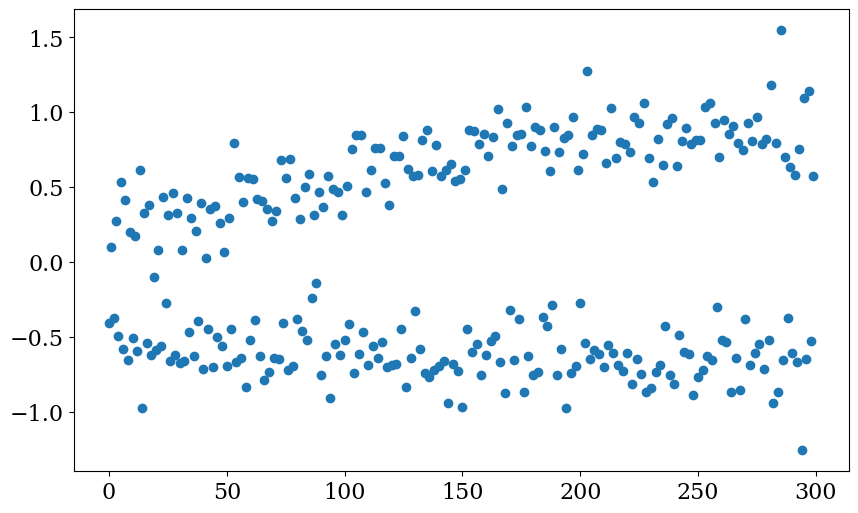

In [104]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(diffs_h*100-generated_dds_h*100,'o')

In [105]:
print(lam_h, wavelength_bins)

[1522.3565 1575.0495 1629.5663 1685.9701 1744.3261 1804.7021] [1159.5614 1199.6971 1241.2219 1284.184  1328.6331 1374.6208 1422.2002
 1471.4264 1522.3565 1575.0495 1629.5663 1685.9701 1744.3261 1804.7021
 1867.1678 1931.7956 1998.6603 2067.8395 2139.4131 2213.4641 2290.0781
 2369.3441]


In [111]:
# generate s
s_res_by_wavelength_naive_h = []
for bin in range(8,14):
    # mask per bin
    bin_mask = []
    for dict in configs_h[::2]:
        if dict['image_rotator']['wavelength'] == wavelength_bins[bin]:
            bin_mask.append(True)
        else:
            bin_mask.append(False)

    # apply mask
    double_diffs_bin = diffs_h[bin_mask]
    double_diffs_stds_bin = stds_h[bin_mask]
    config_lists_bin = np.array(configs_h[::2])[bin_mask]
    modeled_double_differences_bin = generated_dds_h[bin_mask]
    # calculate s_res as in appendix E of SPHERE cal paper
    residuals = (double_diffs_bin*100-modeled_double_differences_bin*100)
    print(np.mean(np.abs(residuals)))
    s_res = np.sqrt(np.sum(residuals**2)/(len(diffs_h[bin_mask])))
    s_res_by_wavelength_naive_h.append(s_res)

0.42836010501783334
0.5271199400020893
0.651158114177793
0.720078846748273
0.7456905547426724
0.7725934201310865


Text(0.5, 1.0, 'Polarimetric Accuracy of Naive Model on HD30675 in H Band')

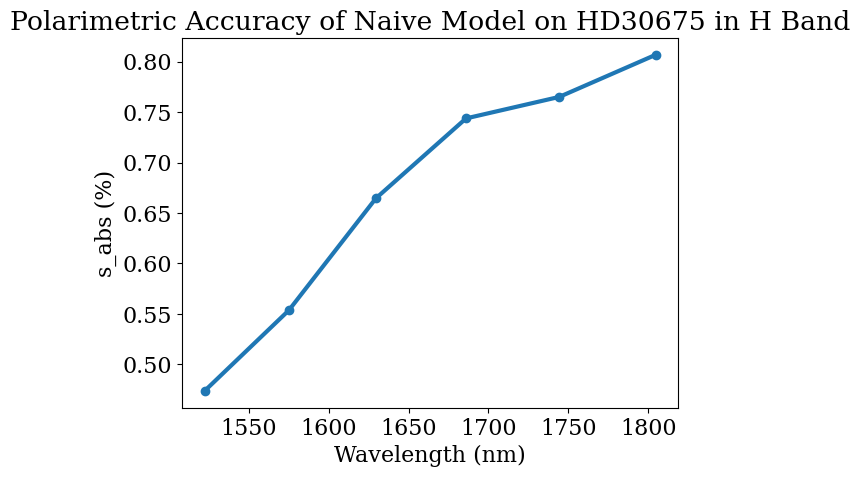

In [124]:
plt.plot(lam_h,s_res_by_wavelength_naive_h,'o-')
plt.xlabel('Wavelength (nm)')
plt.ylabel('s_abs (%)')
plt.title('Polarimetric Accuracy of Naive Model on HD30675 in H Band')

Parameter 'wavelength' not found in component 'hwp'. Skipping...
Parameter 'wavelength' not found in component 'image_rotator'. Skipping...
Parameter 'wavelength' not found in component 'wollaston'. Skipping...
Parameter 'wavelength' not found in component 'hwp'. Skipping...
Parameter 'wavelength' not found in component 'image_rotator'. Skipping...
Parameter 'wavelength' not found in component 'wollaston'. Skipping...
Parameter 'wavelength' not found in component 'hwp'. Skipping...
Parameter 'wavelength' not found in component 'image_rotator'. Skipping...
Parameter 'wavelength' not found in component 'wollaston'. Skipping...
Parameter 'wavelength' not found in component 'hwp'. Skipping...
Parameter 'wavelength' not found in component 'image_rotator'. Skipping...
Parameter 'wavelength' not found in component 'wollaston'. Skipping...
Parameter 'wavelength' not found in component 'hwp'. Skipping...
Parameter 'wavelength' not found in component 'image_rotator'. Skipping...
Parameter 'wavel

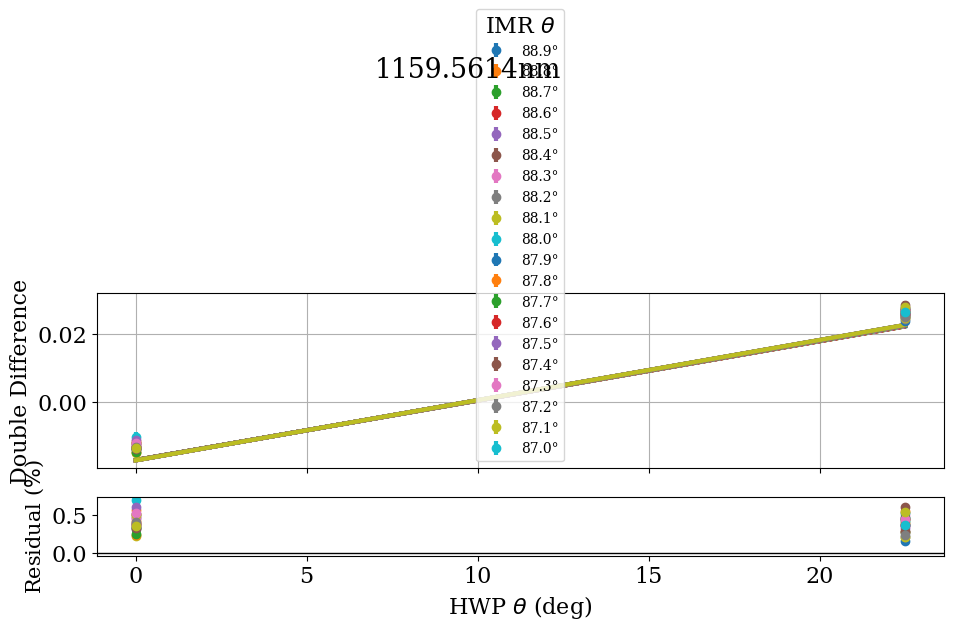

[-18.83347219 -18.82815122 -18.81544081 -18.81049899 -18.79866718
 -18.78944059 -18.76910231 -18.76348674 -18.75343092 -18.74928153
 -18.73784044 -18.7390264  -18.72958137 -18.72124082 -18.71332902
 -18.69075446 -18.67868142 -18.68554331 -18.68101128 -18.67022515
 -18.66530411 -18.67155585 -18.6556574  -18.65543901 -18.6421228 ]
[-13.37089277 -11.69930564 -13.03669823 -13.92304192 -14.16626366
 -12.63074101 -11.97473786 -14.19462391 -12.36437628 -14.33832663
 -13.18173528 -14.74753343 -10.37142156 -13.36491059 -14.69881436
 -12.21202806 -14.22727268 -13.06844173 -11.67840846 -13.78958284
 -14.37905824 -11.99324473 -14.15385249 -12.61256518 -13.75339308]
Wavelength bin 1159.5614 nm: s_abs = 0.41569303248462736
Parameter 'wavelength' not found in component 'hwp'. Skipping...
Parameter 'wavelength' not found in component 'image_rotator'. Skipping...
Parameter 'wavelength' not found in component 'wollaston'. Skipping...
Parameter 'wavelength' not found in component 'hwp'. Skipping...
Param

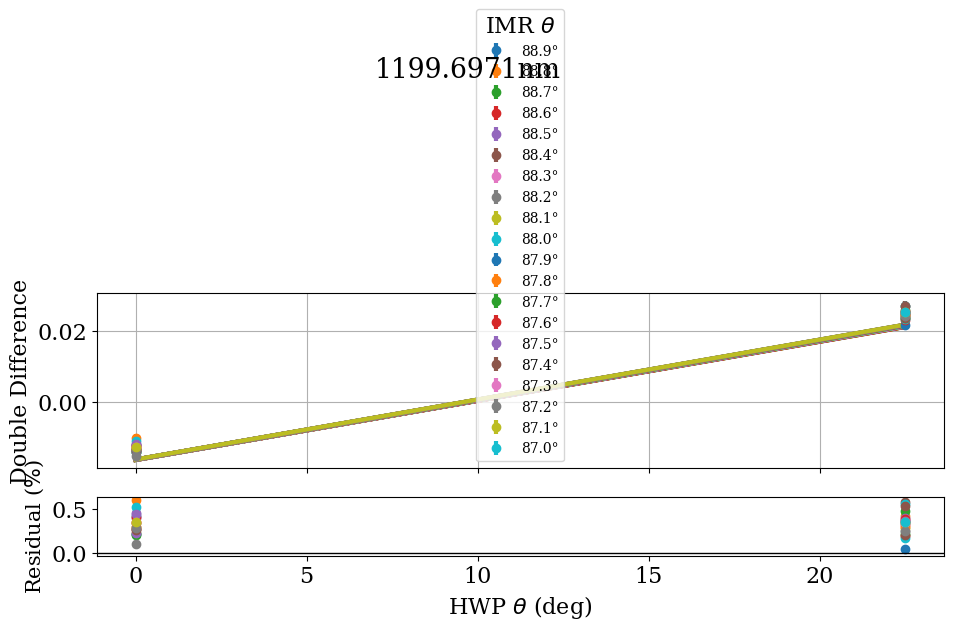

[-18.69000159 -18.66858911 -18.63844479 -18.61739942 -18.58824486
 -18.56215339 -18.52284601 -18.50117115 -18.47387788 -18.45347261
 -18.4245292  -18.41055298 -18.38385772 -18.35854    -18.33368776
 -18.29153273 -18.26174932 -18.25416662 -18.2332577  -18.20479056
 -18.18316399 -18.17464106 -18.14022748 -18.12408395 -18.09266432]
[-14.43803063 -10.81619036 -13.37864611 -13.72433893 -14.98328584
 -12.83230351 -11.55918483 -13.95220579 -13.87408474 -15.10008615
 -14.70294034 -12.92226287 -12.51450438 -14.40658804 -13.45744356
 -13.3193088  -15.20736827 -12.48176124 -12.27227932 -13.43566112
 -14.72185149 -13.17606454 -15.80021133 -13.69456333 -13.02688949]
Wavelength bin 1199.6971 nm: s_abs = 0.3535291414442757
Parameter 'wavelength' not found in component 'hwp'. Skipping...
Parameter 'wavelength' not found in component 'image_rotator'. Skipping...
Parameter 'wavelength' not found in component 'wollaston'. Skipping...
Parameter 'wavelength' not found in component 'hwp'. Skipping...
Parame

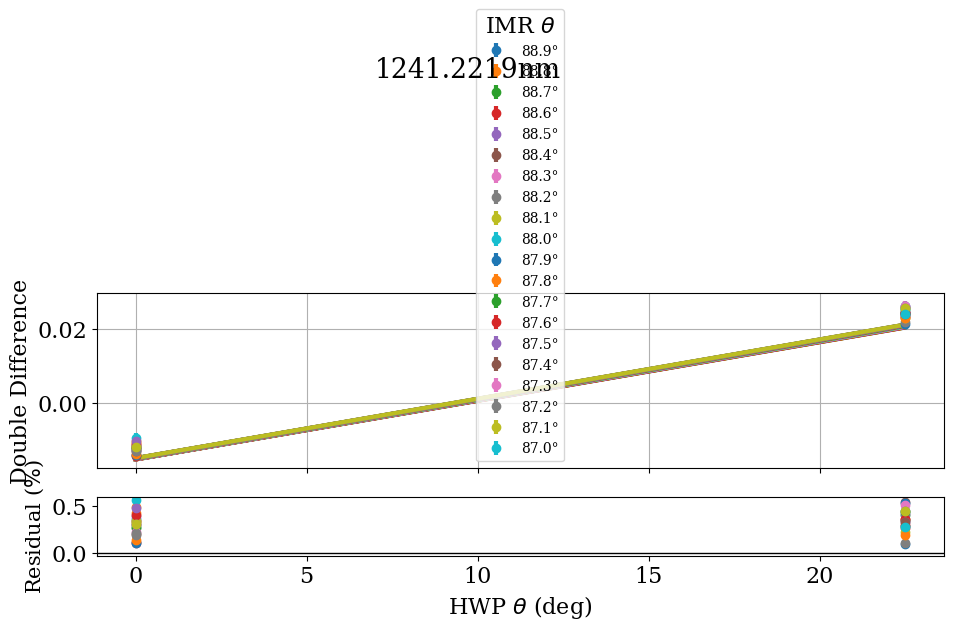

[-18.22941269 -18.19680642 -18.15441294 -18.12229732 -18.08086919
 -18.0432401  -17.99034068 -17.95742413 -17.91834298 -17.8862884
 -17.84535567 -17.82075507 -17.78196415 -17.74478902 -17.70818879
 -17.65217381 -17.60972219 -17.59252831 -17.56039231 -17.51956674
 -17.48604249 -17.46738874 -17.42020067 -17.39281817 -17.34882043]
[-14.14682741 -11.56174812 -12.79663186 -13.92968367 -15.55178929
 -12.66063996 -11.5586593  -14.90862118 -13.08632293 -14.35056196
 -13.47133511 -12.24717505 -10.73189447 -13.97773172 -15.3245728
 -11.77314367 -12.73004124 -11.82616022 -11.21008512 -12.84610139
 -13.9597867  -12.7584595  -13.28587948 -13.11766073 -13.01477326]
Wavelength bin 1241.2219 nm: s_abs = 0.3430028533362098
Parameter 'wavelength' not found in component 'hwp'. Skipping...
Parameter 'wavelength' not found in component 'image_rotator'. Skipping...
Parameter 'wavelength' not found in component 'wollaston'. Skipping...
Parameter 'wavelength' not found in component 'hwp'. Skipping...
Paramete

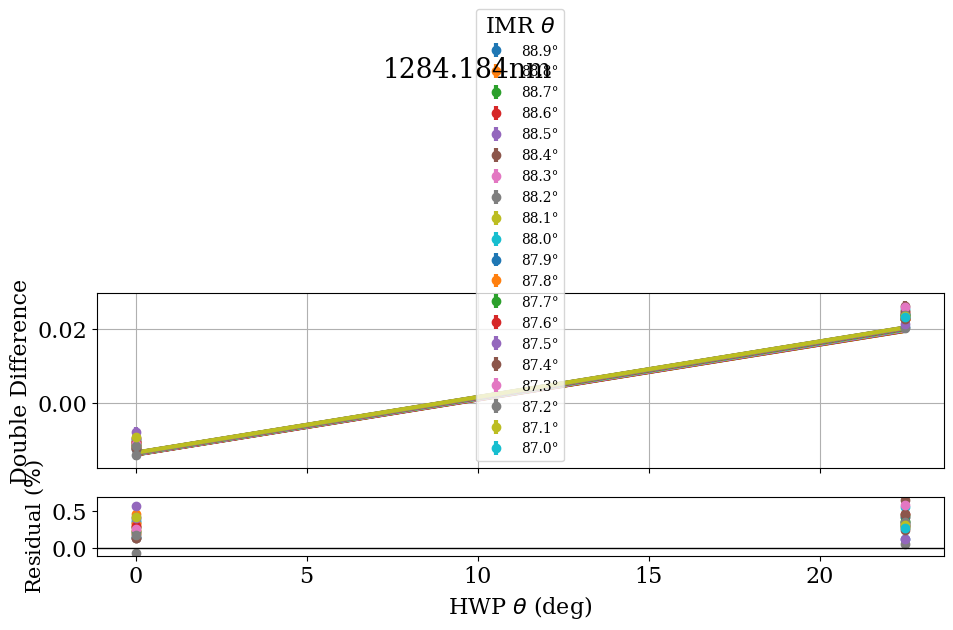

[-17.81193822 -17.76935492 -17.71606611 -17.67408352 -17.62175361
 -17.57384399 -17.50892773 -17.46599182 -17.41647632 -17.37417419
 -17.32262346 -17.28865643 -17.23923302 -17.19159282 -17.14466412
 -17.07646257 -17.02292775 -16.99728525 -16.9553237  -16.90371007
 -16.85982314 -16.83238188 -16.77404564 -16.73691389 -16.68197373]
[-13.48792816 -10.90395704 -11.93636879 -13.07310264 -13.64443679
 -12.84870614 -10.1425772  -14.36189027 -13.70636039 -15.76554876
 -12.91914043 -12.0485945  -11.74241288 -13.38222826 -13.74806063
 -11.96131199 -12.92666363 -11.67693666 -12.04397995  -8.94795767
 -14.1332653  -11.48257206 -15.39428931 -13.32349951 -10.9249646 ]
Wavelength bin 1284.184 nm: s_abs = 0.333698364316195
Parameter 'wavelength' not found in component 'hwp'. Skipping...
Parameter 'wavelength' not found in component 'image_rotator'. Skipping...
Parameter 'wavelength' not found in component 'wollaston'. Skipping...
Parameter 'wavelength' not found in component 'hwp'. Skipping...
Paramete

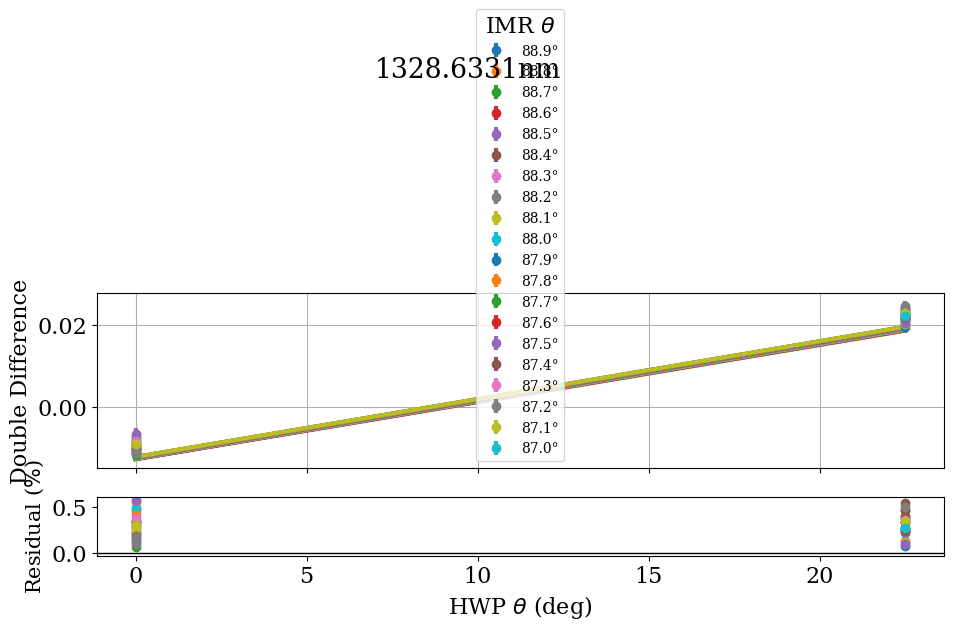

[-17.29390742 -17.24548214 -17.18576803 -17.13809299 -17.07927824
 -17.02547621 -16.95340513 -16.90452586 -16.84913936 -16.80080445
 -16.74323751 -16.70386831 -16.64836559 -16.59468379 -16.54191697
 -16.46663647 -16.40667737 -16.37648639 -16.32911196 -16.27143704
 -16.22161351 -16.18943812 -16.12492578 -16.08232472 -16.02131077]
[-13.64782166  -8.87621964 -12.87374952 -12.33375841 -12.88066037
 -11.89976031  -9.19523362 -13.62886832 -12.73667802 -13.60521709
 -13.2749846   -9.89660289  -8.92530476 -13.16934639 -11.61887503
 -10.13634624 -14.02670501 -10.33581901  -9.00711345 -10.37193686
 -12.77865803 -10.11900621 -12.36761516 -12.26543114 -11.19402701]
Wavelength bin 1328.6331 nm: s_abs = 0.3306560475414707
Parameter 'wavelength' not found in component 'hwp'. Skipping...
Parameter 'wavelength' not found in component 'image_rotator'. Skipping...
Parameter 'wavelength' not found in component 'wollaston'. Skipping...
Parameter 'wavelength' not found in component 'hwp'. Skipping...
Parame

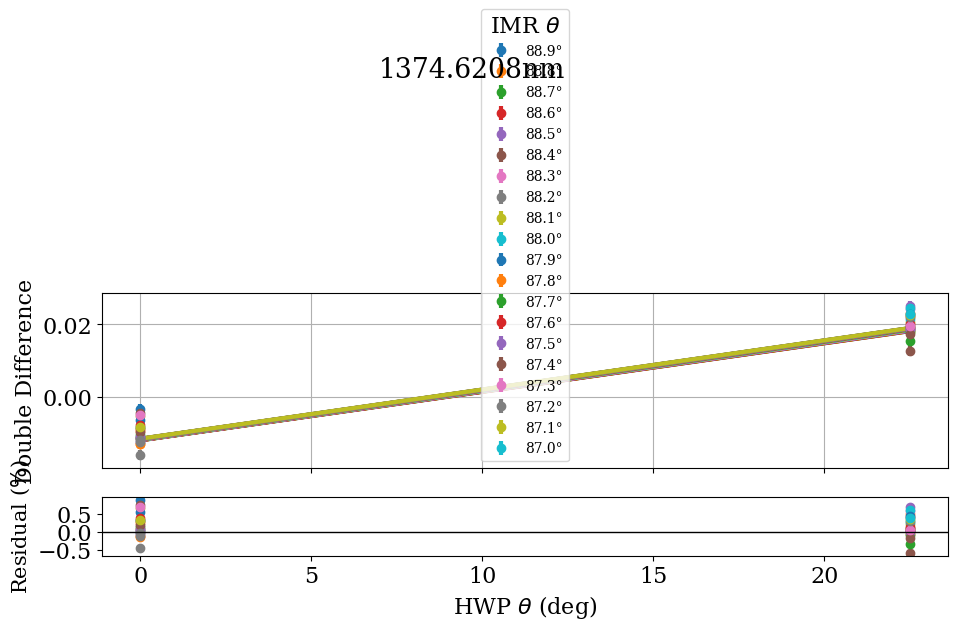

[-16.87554219 -16.83229533 -16.77808722 -16.7356806  -16.68227104
 -16.63399171 -16.56779894 -16.52397803 -16.47437165 -16.43127764
 -16.37948442 -16.34516493 -16.29538302 -16.24721755 -16.20013143
 -16.13109001 -16.07694137 -16.05186359 -16.01018265 -15.95846499
 -15.91418935 -15.88734323 -15.82909827 -15.79196625 -15.73710317]
[ -5.14268447 -13.03384704 -13.13161332 -12.75476152 -12.49692017
 -13.19723607 -20.90805401  -5.30064806 -12.31970438 -20.55902783
  -7.17366198  -9.82201267 -10.8590683   -7.86001584 -17.98206365
 -20.01307911 -16.34969065 -10.78925925 -16.02950528 -14.89200867
 -14.88781529  -7.21780991 -15.01526912 -14.01712662 -10.13052954]
Wavelength bin 1374.6208 nm: s_abs = 0.35623936188188543


In [138]:
# try per bin with new model 
from pyPolCal.plotting import plot_data_and_model
s_abs_list = []
s_p_list = []
s_chi_list = []
modeled_pol = np.array([])
for bin in range(6):
    interleaved_values_pol, interleaved_stds_pol, config_list_pol = read_csv(f'../datacsvs/onsky_csvs/pol_standards/HD30675-J/bin{bin}.csv',mode='m3_mcmc')
    dds_pol = np.array(process_dataset(interleaved_values_pol)[::2])
    # get model ready
    df_elip = model_data('/Users/thomasmcintosh/Desktop/CHARIS-REU/Fitting/naive_fitting/elliptical_imr')
    imr_phi_h = df_elip['image_rotator_phi_h'].values[bin]
    imr_phi_45 = df_elip['image_rotator_phi_45'].values[bin]
    imr_phi_r = df_elip['image_rotator_phi_r'].values[bin]
    df_wol = model_data('/Users/thomasmcintosh/Desktop/CHARIS-REU/Fitting/naive_fitting/imr_naive_wollaston_trans')
    imr_phi_wol = df_wol['image_rotator_phi'].values[bin]
    wol_eta = df_elip['wollaston_eta'].values[bin]
    hwp_phi = HWP_retardance(wavelength_bins[bin], 1.63398,1.27711)[0]
    offset_imr = -0.13959
    offset_hwp = -1.59338
    offset_cal = -0.11835
    lp_eps = 1
    naive_df = model_data('/Users/thomasmcintosh/Desktop/CHARIS-REU/Fitting/naive_fitting/m3_diat_w_middle_optics')
    wavelength_bin = wavelength_bins[bin]
    m1, b1, m2, b2 = (1.94073,13.69728,2.07958,13.88817)
    # define system dictionary
    system_dict_unpol = {
            "components" : {
                "wollaston" : {
                "type" : "wollaston_prism_function",
                "properties" : {"beam": 'o','eta':wol_eta}, 
                "tag": "internal",
                },
                "image_rotator" : {
                    "type" : "elliptical_retarder_function",
                    "properties" : {"phi_h": imr_phi_h, "phi_45": imr_phi_45, "phi_r": imr_phi_r,"theta": 0, "delta_theta": offset_imr},
                    "tag": "internal",
                },
                "hwp" : {
                    "type" : "general_retarder_function",
                    "properties" : {"phi": hwp_phi, "theta": 0, "delta_theta": offset_hwp},
                    "tag": "internal",
                },
                "altitude_rot" : {
                    "type" : "rotator_function",
                    "properties" : {"pa":77},
                    "tag":"internal",
                },
                "M3" : {
                    "type" : "SUBARU_M3_function",
                    "properties" : {"wavelength": wavelength_bin, "m1":m1, "b1":b1, "m2":m2, "b2":b2},
                    "tag": "internal",
                },
                "parang_rot" : {
                    "type" : "rotator_function",
                    "properties" : {"pa":39},
                    "tag":"internal",
                },
            }}
    
    # define p0 dict (it doesnt do anything its just necessary for model function to work)
    p0_dict = {
                "M3" :
                    {"m1":m1, "b1":b1, "m2":m2, "b2":b2}
            }
    p0, pkeys = parse_configuration(p0_dict)
    # generate system mueller matrix
    system_mm = generate_system_mueller_matrix(system_dict_unpol)
    # generate model
    # generate s in
    modeled_dd = model_s_in_array(p0, pkeys, system_mm, config_list_pol, p_max, lam_max, k, aolp_j, process_model=None)
    modeled_interleaved = process_model(modeled_dd)
    modeled_dd = process_model(modeled_dd)[::2]
    modeled_pol = np.concatenate((modeled_pol, modeled_dd))
    print(modeled_pol)
    # plot data and model
    plot_data_and_model(interleaved_values_pol,modeled_interleaved,config_list_pol,interleaved_stds_pol,wavelength=wavelength_bin,include_sums=False)
    # calculate s res as in appendix E of SPHERE cal paper
    modeled_q = modeled_dd[::2]
    modeled_u = modeled_dd[1::2]
    modeled_p = np.sqrt(modeled_q**2+modeled_u**2)
    measured_q = dds_pol[::2]
    measured_u = dds_pol[1::2]
    measured_p = np.sqrt(measured_q**2+measured_u**2)
    residuals_p = (measured_p*100 - modeled_p*100)
    s_p = np.sqrt(np.sum(residuals_p**2)/(len(measured_p)))
    s_p_list.append(s_p)
    modeled_chi = np.rad2deg(0.5*np.arctan2(modeled_q,modeled_u))
    print(modeled_chi)
    measured_chi = np.rad2deg(0.5*np.arctan2(measured_q,measured_u))
    print(measured_chi)
    residuals_chi = (measured_chi - modeled_chi)
    s_chi = np.sqrt(np.sum(residuals_chi**2)/(len(measured_chi)))
    s_chi_list.append(s_chi)
    residuals = (dds_pol*100-modeled_dd*100)
    s_abs = np.sqrt(np.sum(residuals**2)/(len(dds_pol)))
    s_abs_list.append(s_abs)
    print(f'Wavelength bin {wavelength_bins[bin]} nm: s_abs = {s_abs}')



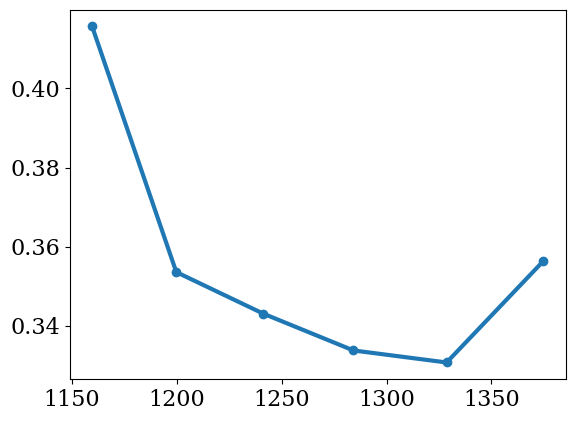

In [135]:
plt.plot(lam_j,s_abs_list,'o-')

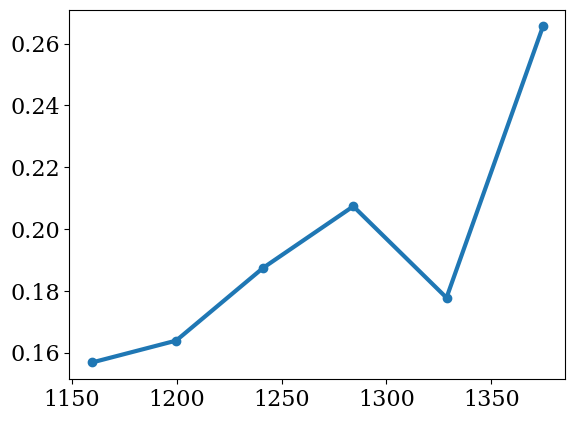

In [136]:
plt.plot(lam_j,s_p_list,'o-')

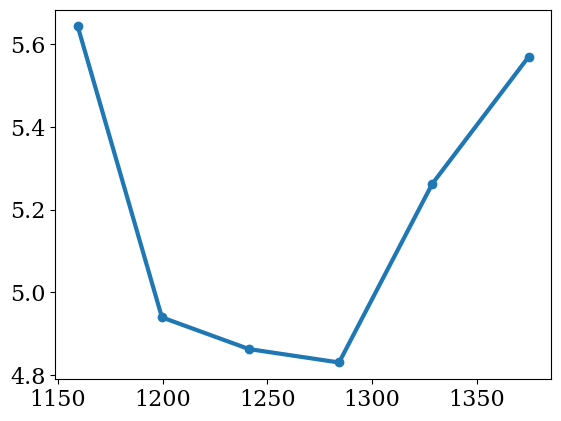

In [137]:
plt.plot(lam_j,s_chi_list,'o-')

In [ ]:
wavelength_bins
print wavelength_bins[]

array([1159.5614, 1199.6971, 1241.2219, 1284.184 , 1328.6331, 1374.6208,
       1422.2002, 1471.4264, 1522.3565, 1575.0495, 1629.5663, 1685.9701,
       1744.3261, 1804.7021, 1867.1678, 1931.7956, 1998.6603, 2067.8395,
       2139.4131, 2213.4641, 2290.0781, 2369.3441])

Parameter 'wavelength' not found in component 'hwp'. Skipping...
Parameter 'wavelength' not found in component 'image_rotator'. Skipping...
Parameter 'wavelength' not found in component 'wollaston'. Skipping...
Parameter 'wavelength' not found in component 'hwp'. Skipping...
Parameter 'wavelength' not found in component 'image_rotator'. Skipping...
Parameter 'wavelength' not found in component 'wollaston'. Skipping...
Parameter 'wavelength' not found in component 'hwp'. Skipping...
Parameter 'wavelength' not found in component 'image_rotator'. Skipping...
Parameter 'wavelength' not found in component 'wollaston'. Skipping...
Parameter 'wavelength' not found in component 'hwp'. Skipping...
Parameter 'wavelength' not found in component 'image_rotator'. Skipping...
Parameter 'wavelength' not found in component 'wollaston'. Skipping...
Parameter 'wavelength' not found in component 'hwp'. Skipping...
Parameter 'wavelength' not found in component 'image_rotator'. Skipping...
Parameter 'wavel

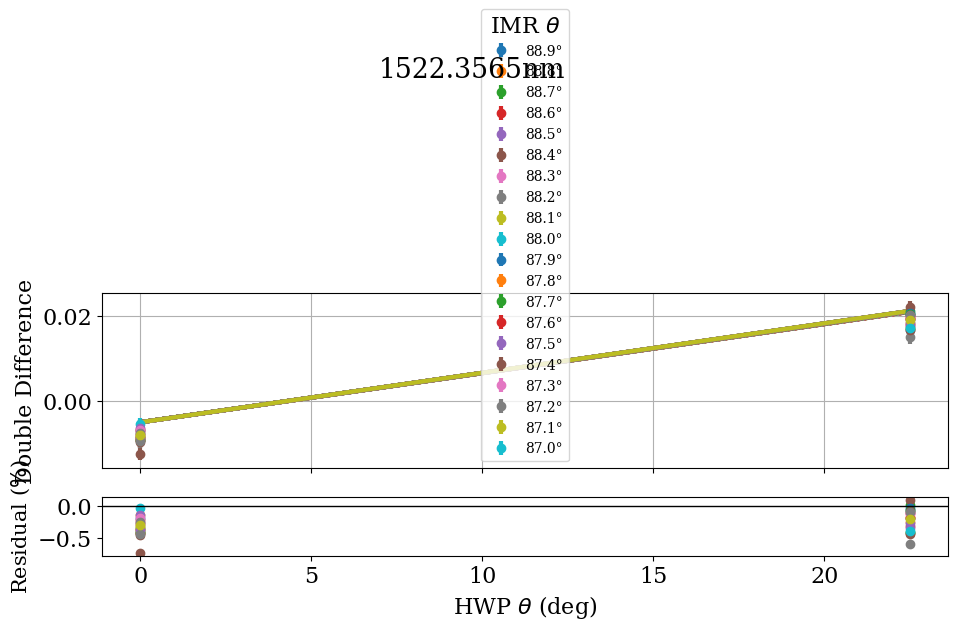

[-6.84541087 -6.84577708 -6.83712385 -6.84003307 -6.83027341 -6.82984191
 -6.8094709  -6.80761684 -6.80692798 -6.80339817 -6.80055786 -6.80609645
 -6.80135232 -6.79766034 -6.79613708 -6.77575207 -6.76446581 -6.78313269
 -6.78707264 -6.7813206  -6.77780371 -6.79227604 -6.78365718 -6.78665594
 -6.77925232]
[-11.29207593  -9.84981881 -10.12371144 -11.7520238  -13.90151353
 -12.02703179 -10.77871919 -16.59875616 -11.17014218 -15.40112328
 -13.49941941 -11.10734631  -7.87186215 -12.08654    -12.25232014
 -14.45232519 -12.06454699 -10.35059491 -12.84845334  -8.91122267
 -15.19090491  -9.67999602 -12.69509211 -10.82580557 -12.64836716]
Wavelength bin 1522.3565 nm: s_abs = 0.3162838254522828
Parameter 'wavelength' not found in component 'hwp'. Skipping...
Parameter 'wavelength' not found in component 'image_rotator'. Skipping...
Parameter 'wavelength' not found in component 'wollaston'. Skipping...
Parameter 'wavelength' not found in component 'hwp'. Skipping...
Parameter 'wavelength' not foun

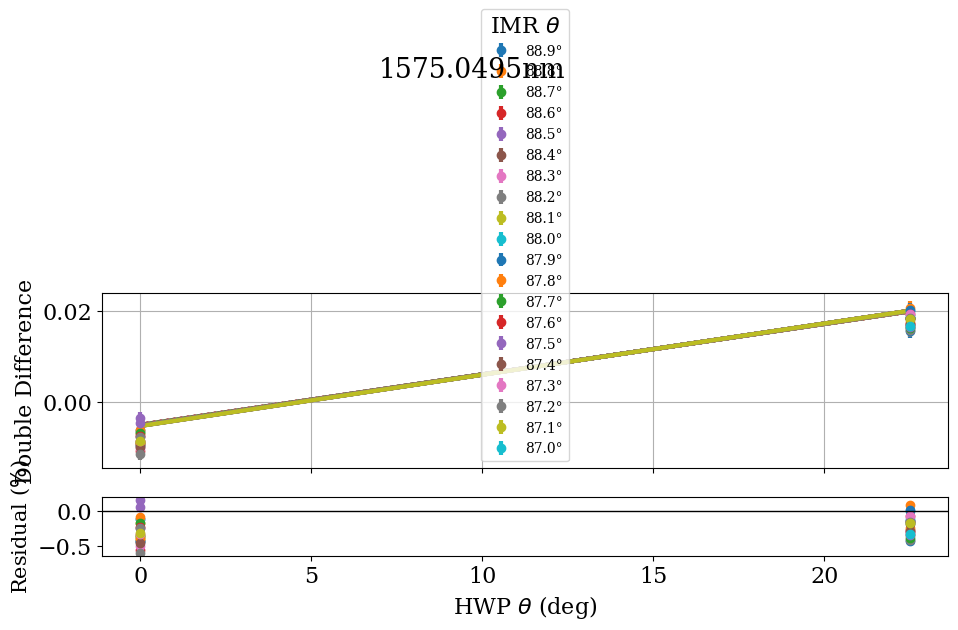

[-6.89849192 -6.91420826 -6.92225914 -6.94018085 -6.94726035 -6.96230172
 -6.96046818 -6.9741524  -6.98916529 -7.00184642 -7.01492639 -7.03525289
 -7.04694721 -7.05936062 -7.07371661 -7.07193828 -7.07809539 -7.10968379
 -7.12885968 -7.13978523 -7.15260161 -7.18096556 -7.1893767  -7.2078801
 -7.21740289]
[-15.23948772  -8.97229934 -12.88208242 -13.59860117 -14.93818929
 -10.98547686  -9.74478955 -13.20077262 -15.59305071 -15.50788494
 -13.72326263 -11.74737197  -9.1663271  -12.51290621 -13.70596257
 -10.07175362 -10.10662751 -10.46550477  -7.69150118  -5.48102128
 -14.72248029 -11.77292404 -15.63294014 -11.28880396 -13.22245762]
Wavelength bin 1575.0495 nm: s_abs = 0.3052521307090992
Parameter 'wavelength' not found in component 'hwp'. Skipping...
Parameter 'wavelength' not found in component 'image_rotator'. Skipping...
Parameter 'wavelength' not found in component 'wollaston'. Skipping...
Parameter 'wavelength' not found in component 'hwp'. Skipping...
Parameter 'wavelength' not found

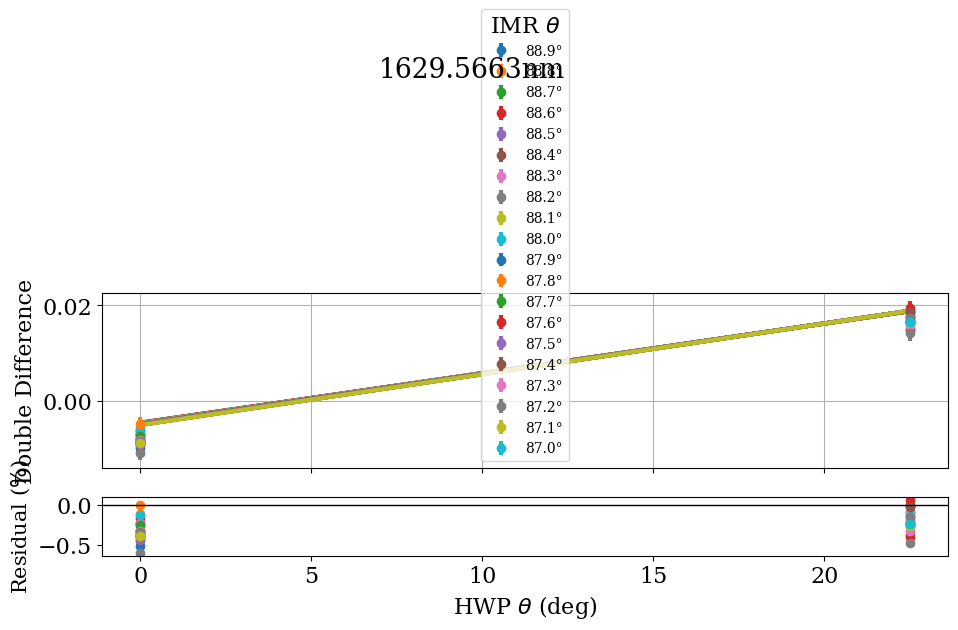

[-6.94143101 -6.97261959 -6.99747339 -7.03053995 -7.05457184 -7.08522334
 -7.10198597 -7.13140081 -7.16220399 -7.19116378 -7.22028878 -7.25552039
 -7.28371703 -7.31237162 -7.3427     -7.35961485 -7.38326304 -7.42793998
 -7.4624426  -7.49011419 -7.51934076 -7.56166352 -7.58720041 -7.62128274
 -7.64782252]
[-12.35492526  -9.16597685 -13.10089357 -11.40055501 -11.58527171
 -13.8035388  -11.06588123 -12.189608   -12.10505315 -15.75960239
 -13.00348673 -12.98494275  -9.00274782 -15.50898878 -13.22922386
  -8.41056941 -10.79682947 -12.4776589  -14.53395193 -12.76727922
 -13.80061883 -13.01642875 -16.25079192 -13.78328364 -14.29716934]
Wavelength bin 1629.5663 nm: s_abs = 0.2880314875194578
Parameter 'wavelength' not found in component 'hwp'. Skipping...
Parameter 'wavelength' not found in component 'image_rotator'. Skipping...
Parameter 'wavelength' not found in component 'wollaston'. Skipping...
Parameter 'wavelength' not found in component 'hwp'. Skipping...
Parameter 'wavelength' not foun

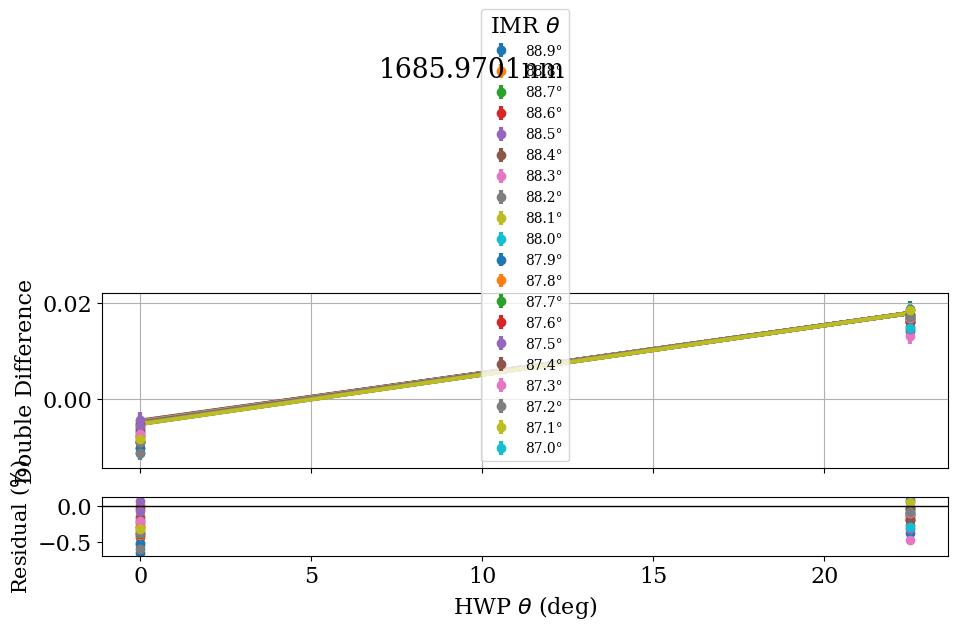

[-6.94349675 -6.98775309 -7.02674923 -7.07262258 -7.11092998 -7.15477581
 -7.18711847 -7.22986887 -7.27397172 -7.31660627 -7.35927001 -7.40708853
 -7.44914285 -7.4915006  -7.53527465 -7.5678678  -7.6061683  -7.66197757
 -7.70938942 -7.75111702 -7.79412473 -7.84820428 -7.8881319  -7.93530602
 -7.97613846]
[-18.98075288  -9.46418943 -11.83259462 -11.56845239 -13.97190943
 -13.19724806 -10.88475241  -9.3346984  -15.72249475 -14.91040035
  -7.7829685  -12.50933796  -8.42856221 -14.02879223 -12.61411455
 -13.42849608 -13.33397165  -8.73450704 -10.44113452  -6.70909191
 -14.49093948 -11.46794422 -16.49066205 -12.73921249 -14.5451761 ]
Wavelength bin 1685.9701 nm: s_abs = 0.2758188565453745
Parameter 'wavelength' not found in component 'hwp'. Skipping...
Parameter 'wavelength' not found in component 'image_rotator'. Skipping...
Parameter 'wavelength' not found in component 'wollaston'. Skipping...
Parameter 'wavelength' not found in component 'hwp'. Skipping...
Parameter 'wavelength' not foun

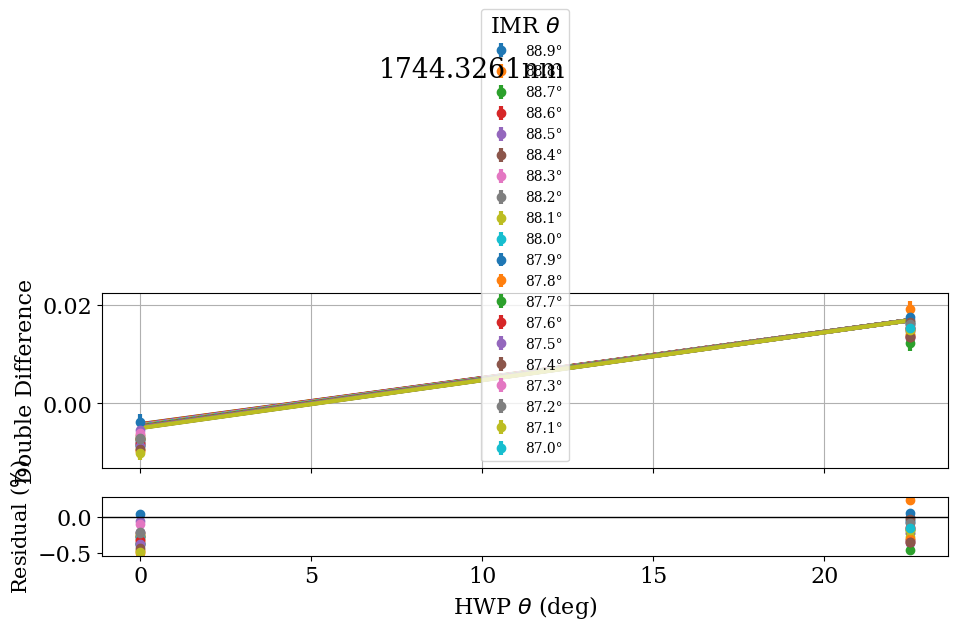

[-6.98391049 -7.0379141  -7.08740457 -7.14283961 -7.19174953 -7.24543193
 -7.28926439 -7.34200212 -7.3959759  -7.44874861 -7.50147901 -7.55868999
 -7.6109983  -7.6635514  -7.71730206 -7.76146037 -7.81057343 -7.87475034
 -7.93174578 -7.98386133 -8.03707336 -8.09989427 -8.15045697 -8.20733548
 -8.25872925]
[ -7.65704139  -9.25565431 -13.29273478 -12.08344372 -12.53853903
 -15.62396695 -10.57565908 -13.78443806 -14.12994165 -14.79576965
 -13.36908258 -14.56096446 -12.51451113 -13.05540254 -17.53936105
 -18.8535822  -14.5183709  -15.32624628  -9.09685677 -13.66796035
 -17.23655495 -10.7447907  -11.94555396 -12.80905613 -16.55807713]
Wavelength bin 1744.3261 nm: s_abs = 0.28644538316617324
Parameter 'wavelength' not found in component 'hwp'. Skipping...
Parameter 'wavelength' not found in component 'image_rotator'. Skipping...
Parameter 'wavelength' not found in component 'wollaston'. Skipping...
Parameter 'wavelength' not found in component 'hwp'. Skipping...
Parameter 'wavelength' not fou

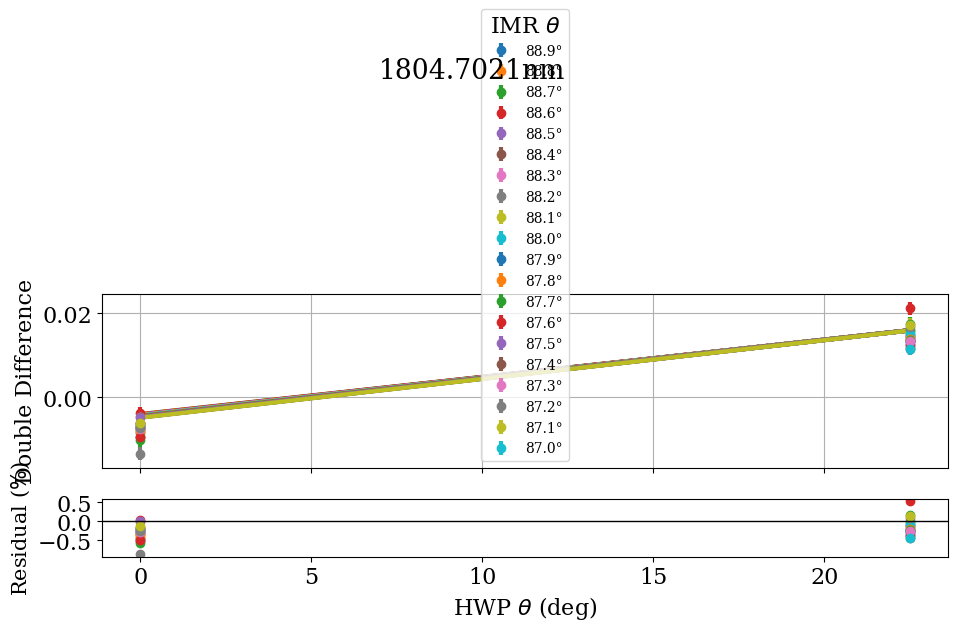

[-7.02602128 -7.08848383 -7.14704082 -7.21078743 -7.26886347 -7.33109182
 -7.3847949  -7.44623741 -7.50875481 -7.57027335 -7.63173419 -7.69710204
 -7.75825434 -7.81964803 -7.88203048 -7.93614234 -7.99455437 -8.06606372
 -8.13136052 -8.19243331 -8.25444953 -8.32484756 -8.38459191 -8.44985412
 -8.51036156]
[-16.08072093 -13.57580147 -11.95846548 -13.26590214  -8.53977138
 -11.02567014 -11.85928042 -16.52292777 -14.15768515 -17.83356338
  -8.70517269 -14.74487665 -12.11339642 -12.57032787 -14.99254676
  -9.50266484 -18.46723449 -12.12846971 -15.047963   -10.4355906
 -15.45287128 -14.77174505 -19.31715977 -11.57226733 -13.93960428]
Wavelength bin 1804.7021 nm: s_abs = 0.3119108181719771


In [140]:
# try per bin with new model H BAND
from pyPolCal.plotting import plot_data_and_model
s_abs_list_h = []
s_p_list_h = []
s_chi_list_h = []
modeled_pol = np.array([])
for bin in range(8,14):
    interleaved_values_pol, interleaved_stds_pol, config_list_pol = read_csv(f'../datacsvs/onsky_csvs/pol_standards/HD-30675-H/bin{bin}.csv',mode='m3_mcmc')
    dds_pol = np.array(process_dataset(interleaved_values_pol)[::2])
    # get model ready
    df_elip = model_data('/Users/thomasmcintosh/Desktop/CHARIS-REU/Fitting/naive_fitting/elliptical_imr')
    imr_phi_h = df_elip['image_rotator_phi_h'].values[bin]
    imr_phi_45 = df_elip['image_rotator_phi_45'].values[bin]
    imr_phi_r = df_elip['image_rotator_phi_r'].values[bin]
    df_wol = model_data('/Users/thomasmcintosh/Desktop/CHARIS-REU/Fitting/naive_fitting/imr_naive_wollaston_trans')
    imr_phi_wol = df_wol['image_rotator_phi'].values[bin]
    wol_eta = df_elip['wollaston_eta'].values[bin]
    hwp_phi = HWP_retardance(wavelength_bins[bin], 1.63398,1.27711)[0]
    offset_imr = -0.13959
    offset_hwp = -1.59338
    offset_cal = -0.11835
    lp_eps = 1
    naive_df = model_data('/Users/thomasmcintosh/Desktop/CHARIS-REU/Fitting/naive_fitting/m3_diat_w_middle_optics')
    wavelength_bin = wavelength_bins[bin]
    m1, b1, m2, b2 = (1.94073,13.69728,2.07958,13.88817)
    # define system dictionary
    system_dict_unpol = {
            "components" : {
                "wollaston" : {
                "type" : "wollaston_prism_function",
                "properties" : {"beam": 'o','eta':wol_eta}, 
                "tag": "internal",
                },
                "image_rotator" : {
                    "type" : "elliptical_retarder_function",
                    "properties" : {"phi_h": imr_phi_h, "phi_45": imr_phi_45, "phi_r": imr_phi_r,"theta": 0, "delta_theta": offset_imr},
                    "tag": "internal",
                },
                "hwp" : {
                    "type" : "general_retarder_function",
                    "properties" : {"phi": hwp_phi, "theta": 0, "delta_theta": offset_hwp},
                    "tag": "internal",
                },
                "altitude_rot" : {
                    "type" : "rotator_function",
                    "properties" : {"pa":77},
                    "tag":"internal",
                },
                "M3" : {
                    "type" : "SUBARU_M3_function",
                    "properties" : {"wavelength": wavelength_bin, "m1":m1, "b1":b1, "m2":m2, "b2":b2},
                    "tag": "internal",
                },
                "parang_rot" : {
                    "type" : "rotator_function",
                    "properties" : {"pa":39},
                    "tag":"internal",
                },
            }}
    
    # define p0 dict (it doesnt do anything its just necessary for model function to work)
    p0_dict = {
                "M3" :
                    {"m1":m1, "b1":b1, "m2":m2, "b2":b2}
            }
    p0, pkeys = parse_configuration(p0_dict)
    # generate system mueller matrix
    system_mm = generate_system_mueller_matrix(system_dict_unpol)
    # generate model
    # generate s in
    modeled_dd = model_s_in_array(p0, pkeys, system_mm, config_list_pol, p_max, lam_max, k, aolp_h, process_model=None)
    modeled_interleaved = process_model(modeled_dd)
    modeled_dd = process_model(modeled_dd)[::2]
    modeled_pol = np.concatenate((modeled_pol, modeled_dd))
    print(modeled_pol)
    # plot data and model
    plot_data_and_model(interleaved_values_pol,modeled_interleaved,config_list_pol,interleaved_stds_pol,wavelength=wavelength_bin,include_sums=False)
    modeled_q = modeled_dd[::2]
    modeled_u = modeled_dd[1::2]
    modeled_p = np.sqrt(modeled_q**2+modeled_u**2)
    measured_q = dds_pol[::2]
    measured_u = dds_pol[1::2]
    measured_p = np.sqrt(measured_q**2+measured_u**2)
    residuals_p = (measured_p*100 - modeled_p*100)
    s_p = np.sqrt(np.sum(residuals_p**2)/(len(measured_p)))
    s_p_list_h.append(s_p)
    modeled_chi = np.rad2deg(0.5*np.arctan2(modeled_q,modeled_u))
    print(modeled_chi)
    measured_chi = np.rad2deg(0.5*np.arctan2(measured_q,measured_u))
    print(measured_chi)
    residuals_chi = (measured_chi - modeled_chi)
    s_chi = np.sqrt(np.sum(residuals_chi**2)/(len(measured_chi)))
    s_chi_list_h.append(s_chi)
    # calculate s res as in appendix E of SPHERE cal paper
    residuals = (dds_pol*100-modeled_dd*100)
    s_abs = np.sqrt(np.sum(residuals**2)/(len(dds_pol)))
    s_abs_list_h.append(s_abs)
    print(f'Wavelength bin {wavelength_bins[bin]} nm: s_abs = {s_abs}')



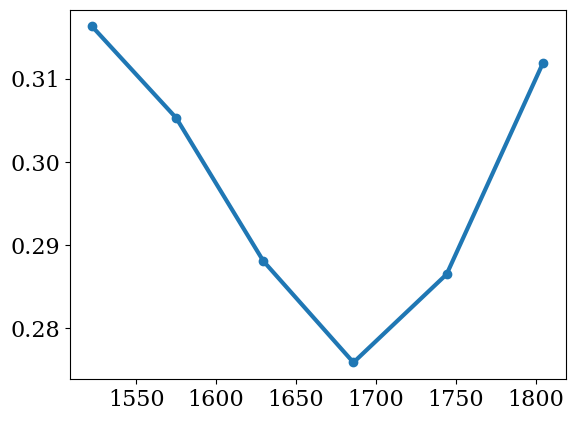

In [108]:
plt.plot(lam_h,s_abs_list_h,'o-')

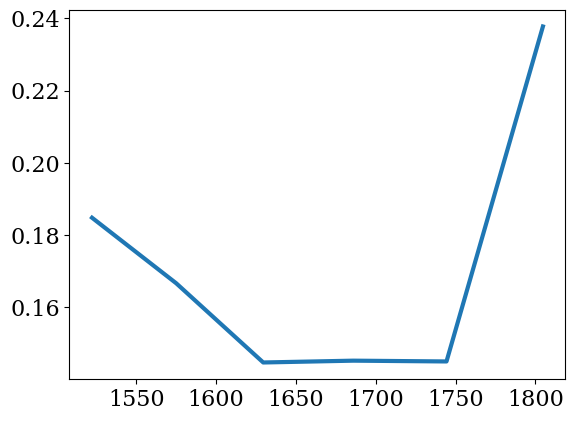

In [141]:
plt.plot(lam_h, s_p_list_h)

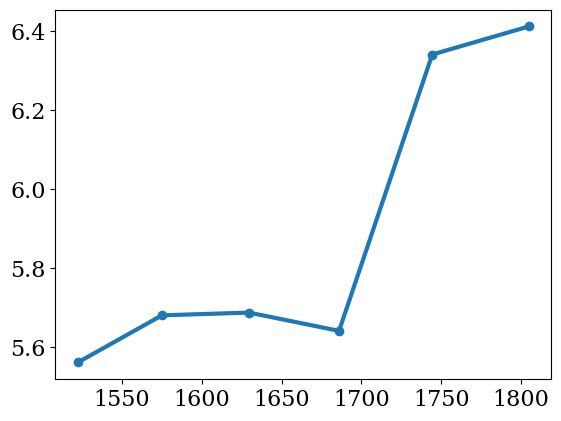

In [143]:
plt.plot(lam_h,s_chi_list_h,'o-')

Parameter 'wavelength' not found in component 'hwp'. Skipping...
Parameter 'wavelength' not found in component 'image_rotator'. Skipping...
Parameter 'wavelength' not found in component 'wollaston'. Skipping...
Parameter 'wavelength' not found in component 'hwp'. Skipping...
Parameter 'wavelength' not found in component 'image_rotator'. Skipping...
Parameter 'wavelength' not found in component 'wollaston'. Skipping...
Parameter 'wavelength' not found in component 'hwp'. Skipping...
Parameter 'wavelength' not found in component 'image_rotator'. Skipping...
Parameter 'wavelength' not found in component 'wollaston'. Skipping...
Parameter 'wavelength' not found in component 'hwp'. Skipping...
Parameter 'wavelength' not found in component 'image_rotator'. Skipping...
Parameter 'wavelength' not found in component 'wollaston'. Skipping...
Parameter 'wavelength' not found in component 'hwp'. Skipping...
Parameter 'wavelength' not found in component 'image_rotator'. Skipping...
Parameter 'wavel

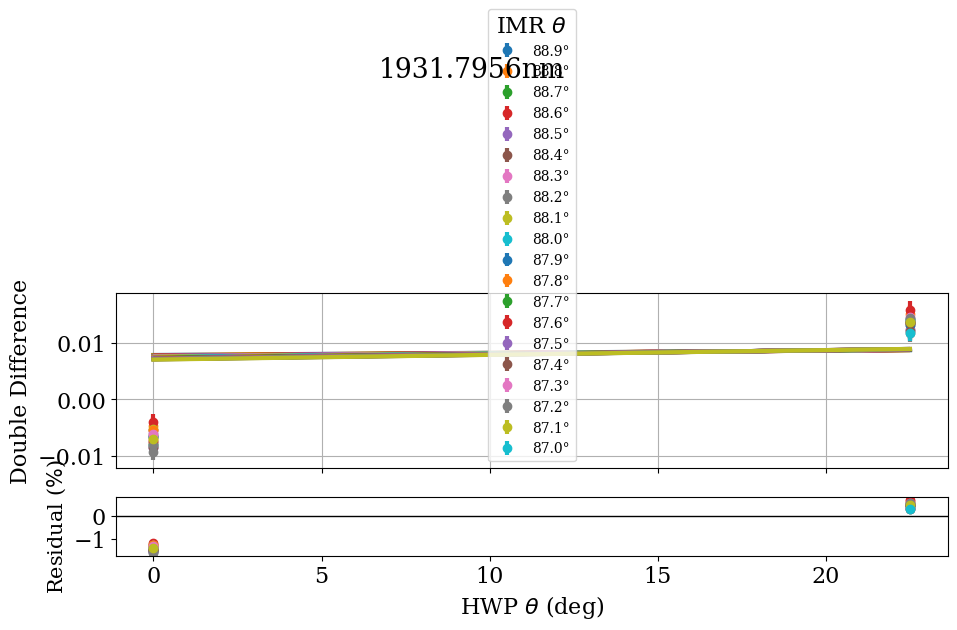

Wavelength bin 1931.7956 nm: s_abs = 1.0626233774913743
Parameter 'wavelength' not found in component 'hwp'. Skipping...
Parameter 'wavelength' not found in component 'image_rotator'. Skipping...
Parameter 'wavelength' not found in component 'wollaston'. Skipping...
Parameter 'wavelength' not found in component 'hwp'. Skipping...
Parameter 'wavelength' not found in component 'image_rotator'. Skipping...
Parameter 'wavelength' not found in component 'wollaston'. Skipping...
Parameter 'wavelength' not found in component 'hwp'. Skipping...
Parameter 'wavelength' not found in component 'image_rotator'. Skipping...
Parameter 'wavelength' not found in component 'wollaston'. Skipping...
Parameter 'wavelength' not found in component 'hwp'. Skipping...
Parameter 'wavelength' not found in component 'image_rotator'. Skipping...
Parameter 'wavelength' not found in component 'wollaston'. Skipping...
Parameter 'wavelength' not found in component 'hwp'. Skipping...
Parameter 'wavelength' not found in

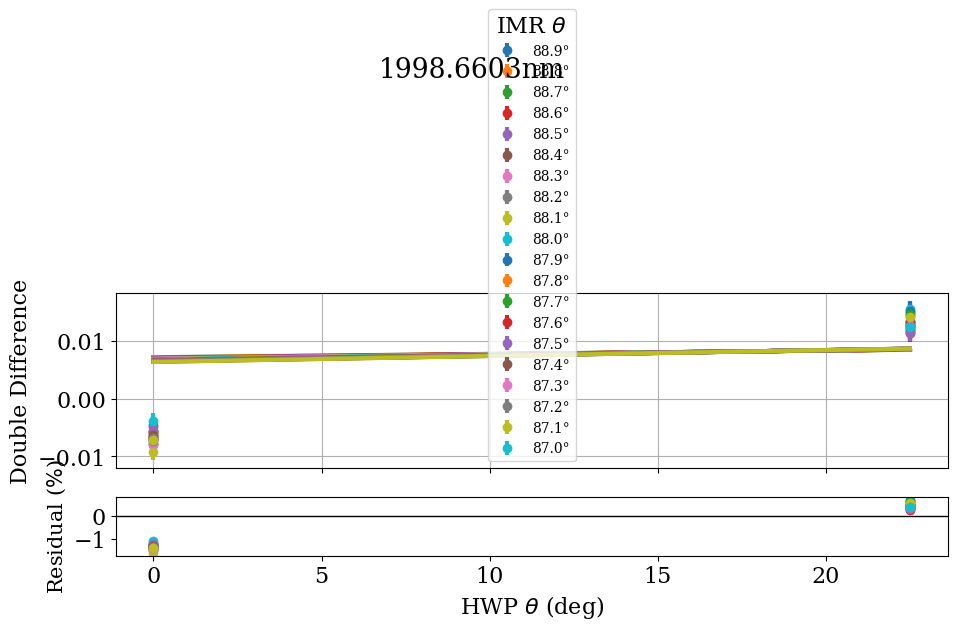

Wavelength bin 1998.6603 nm: s_abs = 0.9962245472704991
Parameter 'wavelength' not found in component 'hwp'. Skipping...
Parameter 'wavelength' not found in component 'image_rotator'. Skipping...
Parameter 'wavelength' not found in component 'wollaston'. Skipping...
Parameter 'wavelength' not found in component 'hwp'. Skipping...
Parameter 'wavelength' not found in component 'image_rotator'. Skipping...
Parameter 'wavelength' not found in component 'wollaston'. Skipping...
Parameter 'wavelength' not found in component 'hwp'. Skipping...
Parameter 'wavelength' not found in component 'image_rotator'. Skipping...
Parameter 'wavelength' not found in component 'wollaston'. Skipping...
Parameter 'wavelength' not found in component 'hwp'. Skipping...
Parameter 'wavelength' not found in component 'image_rotator'. Skipping...
Parameter 'wavelength' not found in component 'wollaston'. Skipping...
Parameter 'wavelength' not found in component 'hwp'. Skipping...
Parameter 'wavelength' not found in

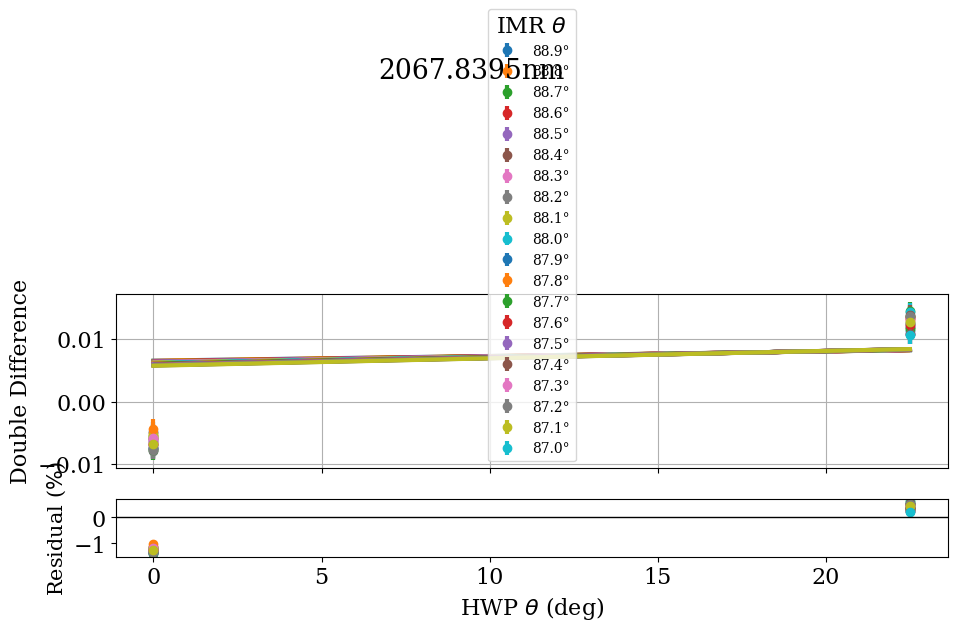

Wavelength bin 2067.8395 nm: s_abs = 0.9417826556127239


In [144]:
# try per bin with new model K BAND
aolp_k = 62 # plus minus 7
lam_k = wavelength_bins[15:18] # first one is slightly out of range
from pyPolCal.plotting import plot_data_and_model
s_abs_list_k = []
s_p_list_k = []
s_chi_list_k = []
modeled_pol = np.array([])
for bin in range(15,18):
    interleaved_values_pol, interleaved_stds_pol, config_list_pol = read_csv(f'../datacsvs/onsky_csvs/pol_standards/HD-30675-K/bin{bin}.csv',mode='m3_mcmc')
    dds_pol = np.array(process_dataset(interleaved_values_pol)[::2])
    # get model ready
    df_elip = model_data('/Users/thomasmcintosh/Desktop/CHARIS-REU/Fitting/naive_fitting/elliptical_imr')
    imr_phi_h = df_elip['image_rotator_phi_h'].values[bin]
    imr_phi_45 = df_elip['image_rotator_phi_45'].values[bin]
    imr_phi_r = df_elip['image_rotator_phi_r'].values[bin]
    df_wol = model_data('/Users/thomasmcintosh/Desktop/CHARIS-REU/Fitting/naive_fitting/imr_naive_wollaston_trans')
    imr_phi_wol = df_wol['image_rotator_phi'].values[bin]
    wol_eta = df_elip['wollaston_eta'].values[bin]
    hwp_phi = HWP_retardance(wavelength_bins[bin], 1.63332,1.2768616)[0]
    offset_imr = -9.04716434e-02
    offset_hwp = -5.75614983e-01
    offset_cal =-1.8104594
    lp_eps = 1
    naive_df = model_data('/Users/thomasmcintosh/Desktop/CHARIS-REU/Fitting/naive_fitting/m3_diat_w_middle_optics')
    wavelength_bin = wavelength_bins[bin]
    m1, b1, m2, b2 = (1.94073,13.69728,2.07958,13.88817)
    # define system dictionary
    system_dict_unpol = {
            "components" : {
                "wollaston" : {
                "type" : "wollaston_prism_function",
                "properties" : {"beam": 'o','eta':wol_eta}, 
                "tag": "internal",
                },
                "image_rotator" : {
                    "type" : "elliptical_retarder_function",
                    "properties" : {"phi_h": imr_phi_h, "phi_45": imr_phi_45, "phi_r": imr_phi_r,"theta": 0, "delta_theta": offset_imr},
                    "tag": "internal",
                },
                "hwp" : {
                    "type" : "general_retarder_function",
                    "properties" : {"phi": hwp_phi, "theta": 0, "delta_theta": offset_hwp},
                    "tag": "internal",
                },
                "altitude_rot" : {
                    "type" : "rotator_function",
                    "properties" : {"pa":77},
                    "tag":"internal",
                },
                "M3" : {
                    "type" : "SUBARU_M3_function",
                    "properties" : {"wavelength": wavelength_bin, "m1":m1, "b1":b1, "m2":m2, "b2":b2},
                    "tag": "internal",
                },
                "parang_rot" : {
                    "type" : "rotator_function",
                    "properties" : {"pa":39},
                    "tag":"internal",
                },
            }}
    
    # define p0 dict (it doesnt do anything its just necessary for model function to work)
    p0_dict = {
                "M3" :
                    {"m1":m1, "b1":b1, "m2":m2, "b2":b2}
            }
    p0, pkeys = parse_configuration(p0_dict)
    # generate system mueller matrix
    system_mm = generate_system_mueller_matrix(system_dict_unpol)
    # generate model
    # generate s in
    modeled_dd = model_s_in_array(p0, pkeys, system_mm, config_list_pol, p_max, lam_max, k, aolp_k, process_model=None)
    modeled_interleaved = process_model(modeled_dd)
    modeled_dd = process_model(modeled_dd)[::2]
    modeled_pol = np.concatenate((modeled_pol, modeled_dd))
    modeled_q = modeled_dd[::2]
    modeled_u = modeled_dd[1::2]
    modeled_p = np.sqrt(modeled_q**2+modeled_u**2)
    measured_q = dds_pol[::2]
    measured_u = dds_pol[1::2]
    measured_p = np.sqrt(measured_q**2+measured_u**2)
    residuals_p = (measured_p*100 - modeled_p*100)
    s_p = np.sqrt(np.sum(residuals_p**2)/(len(measured_p)))
    s_p_list_k.append(s_p)
    modeled_chi = np.rad2deg(0.5*np.arctan2(modeled_q,modeled_u))
    print(modeled_chi)
    measured_chi = np.rad2deg(0.5*np.arctan2(measured_q,measured_u))
    print(measured_chi)
    residuals_chi = (measured_chi - modeled_chi)
    s_chi = np.sqrt(np.sum(residuals_chi**2)/(len(measured_chi)))
    s_chi_list_k.append(s_chi)
    print(modeled_pol)
    # plot data and model
    plot_data_and_model(interleaved_values_pol,modeled_interleaved,config_list_pol,interleaved_stds_pol,wavelength=wavelength_bin,include_sums=False)
    # calculate s res as in appendix E of SPHERE cal paper
    residuals = (dds_pol*100-modeled_dd*100)
    s_abs = np.sqrt(np.sum(residuals**2)/(len(dds_pol)))
    s_abs_list_k.append(s_abs)
    print(f'Wavelength bin {wavelength_bins[bin]} nm: s_abs = {s_abs}')



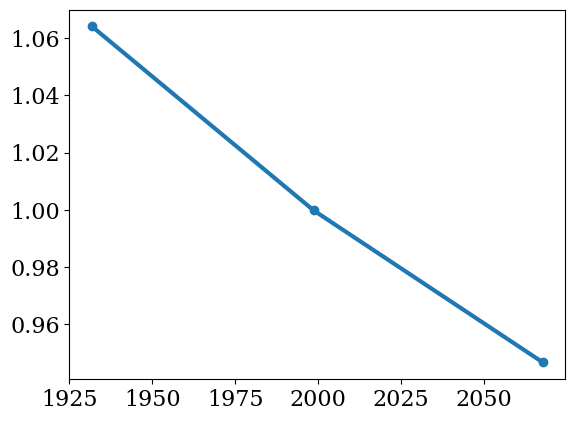

In [86]:
plt.plot(lam_k,s_abs_list_k,'o-')


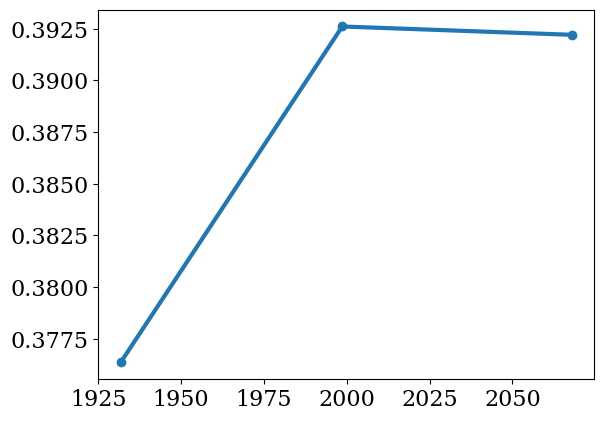

In [146]:
plt.plot(lam_k, s_p_list_k, 'o-')

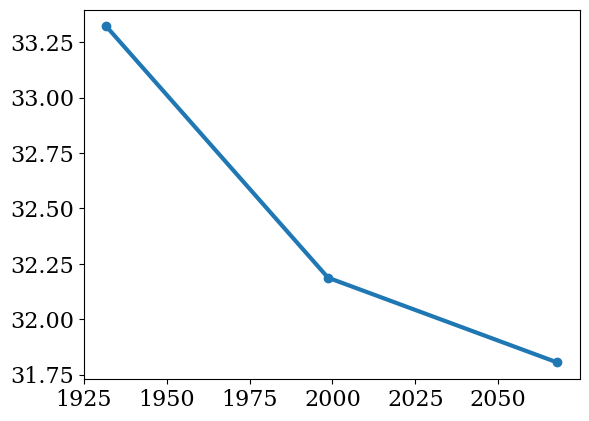

In [147]:
plt.plot(lam_k, s_chi_list_k, 'o-')

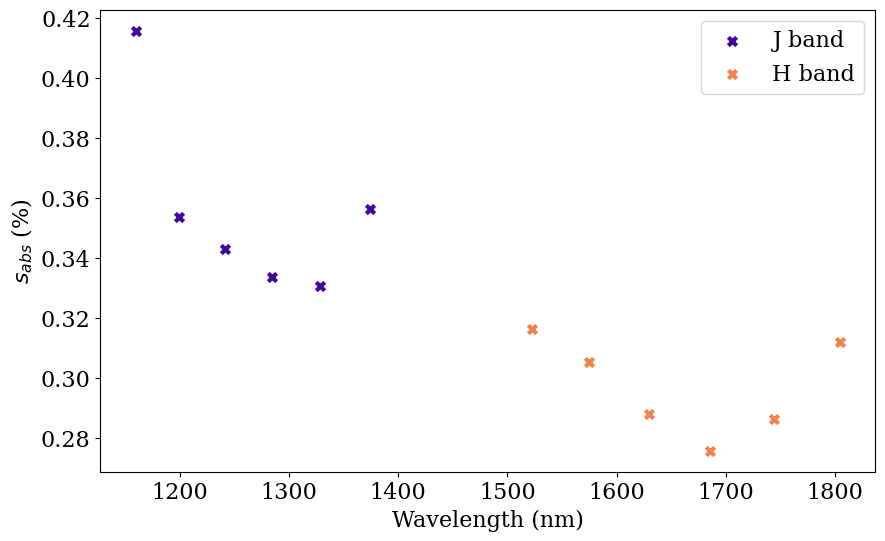

In [ ]:

s_j_h = np.concatenate((s_abs_list,s_abs_list_h))
lam_j_h = np.concatenate((lam_j,lam_h))

fig, ax = plt.subplots(figsize=(10,6))
cmap = plt.get_cmap('plasma')
c1 = cmap(0.1)
c2 = cmap(0.7)
ax.scatter(lam_j,s_abs_list,marker='x',color=c1,label='J band')
ax.scatter(lam_h,s_abs_list_h,marker='x',color=c2,label='H band')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel(r'$s_{abs}$ (%)')
ax.legend()
#plt.title('Polarimetric Accuracy for HD30675 Polarized Standard Star')
#plt.savefig('/Users/thomasmcintosh/Desktop/CHARIS-REU/overleaf_plots/s_abs_pol_std',dpi=600, bbox_inches='tight')

Text(0.5, 1.0, 'Accuracy of DoLP for HD30675 Polarized Standard Star')

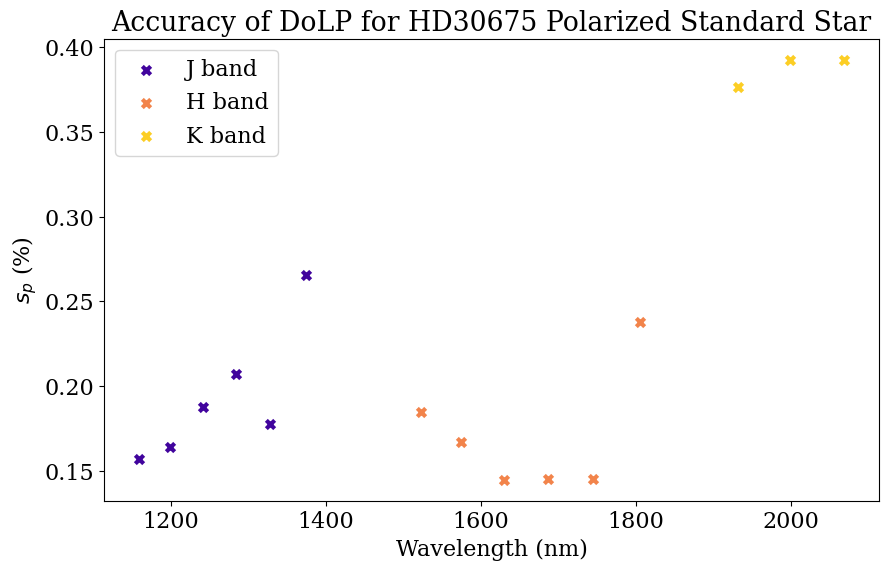

In [152]:
# plot s_p 

fig_p, ax_p = plt.subplots(figsize=(10,6))
cmap = plt.get_cmap('plasma')
c1 = cmap(0.1)
c2 = cmap(0.7)
c3 = cmap(0.9)
ax_p.scatter(lam_j,s_p_list,marker='x',color=c1,label='J band')
ax_p.scatter(lam_h,s_p_list_h,marker='x',color=c2,label='H band')
ax_p.scatter(lam_k,s_p_list_k,marker='x',color=c3,label='K band')
ax_p.set_xlabel('Wavelength (nm)')
ax_p.set_ylabel(r'$s_{p}$ (%)')
ax_p.legend()
plt.title('Accuracy of DoLP for HD30675 Polarized Standard Star')
#plt.savefig('/Users/thomasmcintosh/Desktop/CHARIS-REU/overleaf_plots/s_p_pol_std',dpi=600, bbox_inches='tight')

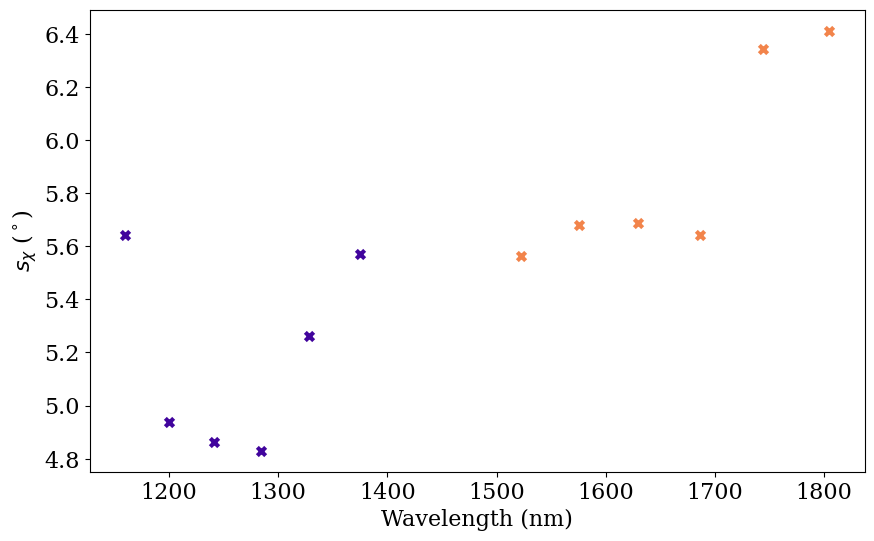

In [ ]:
# plot s chi 

fig_chi, ax_chi = plt.subplots(figsize=(10,6))
cmap = plt.get_cmap('plasma')
c1 = cmap(0.1)
c2 = cmap(0.7)
c3 = cmap(0.9)
ax_chi.scatter(lam_j,s_chi_list,marker='x',color=c1,label='J band')
ax_chi.scatter(lam_h,s_chi_list_h,marker='x',color=c2,label='H band')
#ax_chi.scatter(lam_k,s_chi_list_k,marker='x',color=c3,label='K band')
ax_chi.set_xlabel('Wavelength (nm)')
ax_chi.set_ylabel(r'$s_{\chi}$ ($^\circ$)')   
#plt.title('Accuracy of AoLP for HD30675 Polarized Standard Star')   
#plt.savefig('/Users/thomasmcintosh/Desktop/CHARIS-REU/overleaf_plots/s_chi_pol_std',dpi=600, bbox_inches='tight')

In [102]:
# try per bin with new model H BAND
from pyPolCal.plotting import plot_data_and_model
bin = 5
#interleaved_values_pol, interleaved_stds_pol, config_list_pol = read_csv(f'../datacsvs/onsky_csvs/pol_standards/HD-30675-H/bin{bin}.csv',mode='m3_mcmc')
#dds_pol = np.array(process_dataset(interleaved_values_pol)[::2])
# get model ready
df_elip = model_data('/Users/thomasmcintosh/Desktop/CHARIS-REU/Fitting/naive_fitting/elliptical_imr')
imr_phi_h = df_elip['image_rotator_phi_h'].values[bin]
imr_phi_45 = df_elip['image_rotator_phi_45'].values[bin]
imr_phi_r = df_elip['image_rotator_phi_r'].values[bin]
df_wol = model_data('/Users/thomasmcintosh/Desktop/CHARIS-REU/Fitting/naive_fitting/imr_naive_wollaston_trans')
imr_phi_wol = df_wol['image_rotator_phi'].values[bin]
wol_eta = df_elip['wollaston_eta'].values[bin]
hwp_phi = HWP_retardance(wavelength_bins[bin], 1.63398,1.27711)[0]
offset_imr = -0.13959
offset_hwp = -1.59338
offset_cal = -0.11835
lp_eps = 1
wavelength_bin = wavelength_bins[bin]

# define system dictionary
system_dict = {
"components" : {
    "wollaston" : {
    "type" : "wollaston_prism_function",
    "properties" : {"beam": 'e','eta':wol_eta}, 
    "tag": "internal",
    },
    "image_rotator" : {
        "type" : "elliptical_retarder_function",
        "properties" : {"phi_h": imr_phi_h, "phi_45": imr_phi_45, "phi_r": imr_phi_r,"theta": 0, "delta_theta": offset_imr},
        "tag": "internal",
    },
    "hwp" : {
        "type" : "general_retarder_function",
        "properties" : {"phi": hwp_phi, "theta": 0, "delta_theta": offset_hwp},
        "tag": "internal",
    },
    "lp_rot": {
        "type": "rotator_function",
        "properties": {"pa": offset_cal},
        "tag": "internal",
    },
    "lp" : {  # calibration polarizer for internal calibration source
        "type": "diattenuator_retarder_function",
        "properties": {"epsilon": lp_eps},
        "tag": "internal",
    }},
}


# define p0 dict (it doesnt do anything its just necessary for model function to work)
# p0_dict = {
# "M3" :
#     {"m1":m1, "b1":b1, "m2":m2, "b2":b2}
# }
# p0, pkeys = parse_configuration(p0_dict)
# generate system mueller matrix
system_mm = generate_system_mueller_matrix(system_dict)
# generate model
system_mm.evaluate()


array([[0.00837264, 0.00837264, 0.        , 0.        ],
       [0.00280067, 0.00280067, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ]])